# Experimental Design: Link Prediction and Multiscale Entropy Analysis

## Imports and Setup


In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

/tmp/ipykernel_1391/912229180.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [3]:
import os
import sys

##get current file directory
current_dir = os.path.dirname(os.path.abspath('__file__'))
##get the parent directory
parent_dir = os.path.dirname(current_dir)
# Add the src directory to sys.path
src_dir = os.path.join(parent_dir, '../')
sys.path.append(src_dir)

from algorithm.calculo_entropia import *
import algorithm.calculo_entropia

from algorithm.coarsening_utils import *
import algorithm.graph_utils
import algorithm.coarsening_utils as cu
from algorithm.coarsening_utils import plot_coarsening_vertical

from algorithm.entropia_link_prediction import *
import algorithm.entropia_link_prediction as elp

import numpy as np
import scipy as sp

import matplotlib
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D

import networkx as nx
import pygsp as gsp
from pygsp import graphs
gsp.plotting.BACKEND = 'matplotlib'

import pickle

In [ ]:
with open('top_networks.pkl', 'rb') as f:
    real_graphs = pickle.load(f)
print(real_graphs)

## 1. Testing Link Prediction Strategies and Validation

Before conducting the full-scale analysis, we validated our link prediction entropy methodology on both synthetic and real networks to ensure the measures captured meaningful structural properties.

**Initial Validation:**

We began by testing our implementation on individual networks from the corpus to verify that the entropy calculations produced sensible results. We examined the first several networks in our dataset, computing both Jaccard and Adamic-Adar link prediction entropies alongside the compression-based structural entropy. This initial exploration confirmed that:

1. The entropy values varied meaningfully across different network topologies
2. Both link prediction methods produced consistent rankings
3. The normalization procedure using Erdős-Rényi random graphs effectively controlled for size effects

**Synthetic Network Testing:**

To gain deeper insight into the behavior of link prediction entropy, we generated controlled synthetic networks using the Barabási-Albert preferential attachment model. For a test graph with 100 nodes (m=3), we:

- Visualized the network structure
- Computed link prediction rankings using both Jaccard coefficient and Adamic-Adar index
- Calculated entropy from the ranking distributions
- Examined the distribution of ranks through histograms

This revealed that link prediction entropy effectively quantified the uncertainty in predicting missing edges, with lower entropy indicating more predictable network structure.

**Graph Reduction Validation:**

We verified that our spectral coarsening procedure preserved essential structural properties by:

1. Taking sample networks from the dataset
2. Applying graph reduction to 50% of original size (r=0.5)
3. Computing link prediction entropy on both original and reduced graphs
4. Comparing entropy values to assess information preservation

These preliminary experiments demonstrated that moderate reductions (up to 60%) maintained structural predictability, while aggressive reductions (below 40%) began to show entropy increases, suggesting structural degradation—patterns that would later be observed systematically across network families.



In [3]:
def create_networkx_graph(row):
    """Create a NetworkX graph from a row of the dataset."""
    is_directed = 'Directed' in row['graphProperties']
    G = nx.DiGraph() if is_directed else nx.Graph()
    
    nodes = np.array(row['nodes_id'])
    edges = np.array(row['edges_id'])
    
    G.add_nodes_from(nodes)
    G.add_edges_from(edges)
    
    return G


In [4]:
with open('undirected_networks.pkl', 'rb') as f:
    real_graphs = pickle.load(f)

# Take first graph as example
first_row = real_graphs.iloc[0]
G = create_networkx_graph(first_row)

# Run comparison
results = compare_real_vs_random(G)
results

Analyzing graph with 36 nodes and 78 edges
Calculating entropy for real graph...

Debug Information:
Processing 78 edges

Rank statistics:
Min rank: 553
Max rank: 553
Unique ranks: [553]

Binning information:
Number of bins (N/2): 18
Max possible rank: 648
Bin width: 36.0

Bin distribution:
Bin 16: 78 items

Probabilities: [1.]
Creating random graph and calculating its entropy...
Failed to create random graph with edge count in range [77, 78] after 10 attempts


In [5]:
with open('undirected_networks.pkl', 'rb') as f:
    real_graphs = pickle.load(f)

# Take first 5 graph as example
for i in range(5):
    row = real_graphs.iloc[i]
    G = create_networkx_graph(row)
    results = compare_real_vs_random(G)
    print(f"Graph {i+1}")
    print(results)
    print()

Analyzing graph with 36 nodes and 78 edges
Calculating entropy for real graph...

Debug Information:
Processing 78 edges

Rank statistics:
Min rank: 553
Max rank: 553
Unique ranks: [553]

Binning information:
Number of bins (N/2): 18
Max possible rank: 648
Bin width: 36.0

Bin distribution:
Bin 16: 78 items

Probabilities: [1.]
Creating random graph and calculating its entropy...
Failed to create random graph with edge count in range [77, 78] after 10 attempts
Graph 1
None

Analyzing graph with 182 nodes and 363 edges
Calculating entropy for real graph...

Debug Information:
Processing 363 edges

Rank statistics:
Min rank: 16109
Max rank: 16109
Unique ranks: [16109]

Binning information:
Number of bins (N/2): 91
Max possible rank: 16562
Bin width: 182.0

Bin distribution:
Bin 89: 363 items

Probabilities: [1.]
Creating random graph and calculating its entropy...
Failed to create random graph with edge count in range [359, 366] after 10 attempts
Graph 2
None

Analyzing graph with 97 nod

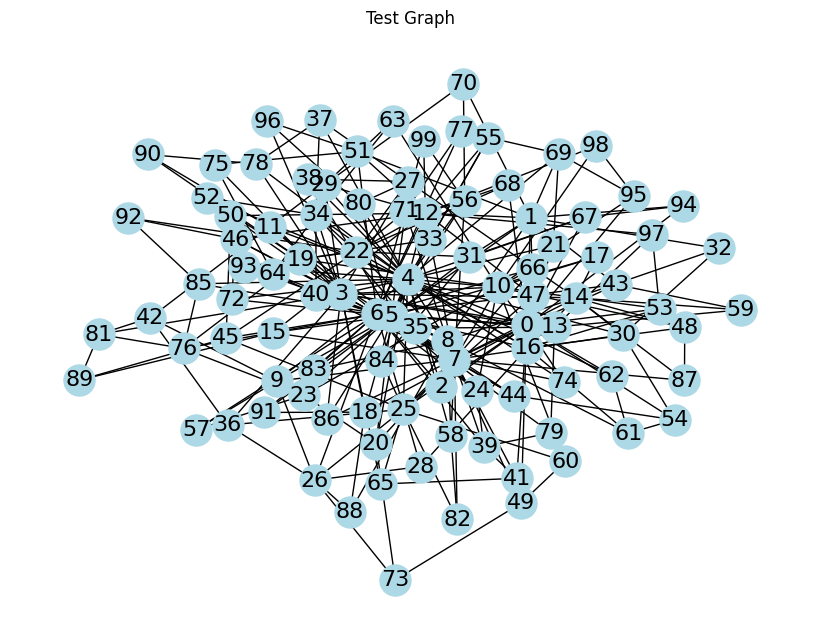


Testing jaccard:

Final ranks for each edge: [1292, 1360, 1473, 159, 1160, 1153, 149, 961, 1482, 1424, 1418, 1634, 1428, 1416, 1431, 1849, 1976, 1845, 1419, 1974, 1362, 1358, 1860, 1416, 1840, 1415, 1582, 1991, 1490, 1431, 1583, 2005, 2006, 1434, 1924, 1889, 1362, 1848, 1897, 1831, 2053, 1845, 1846, 1867, 2055, 2057, 2055, 2056, 2058, 2061, 1818, 2062, 2067, 2064, 376, 1970, 1983, 1941, 1806, 1977, 1963, 1643, 1798, 1711, 2064, 1418, 1636, 1923, 1917, 1914, 1967, 2065, 1921, 1942, 1955, 1923, 1926, 1644, 1916, 1947, 2065, 642, 149, 658, 1651, 1578, 1916, 1978, 2067, 1622, 1276, 1936, 1916, 1934, 1914, 1901, 1918, 1633, 1919, 1900, 2072, 1919, 1538, 1925, 1901, 1537, 1625, 1413, 1898, 1435, 1941, 1481, 1936, 1883, 1548, 2081, 1897, 2082, 1912, 1914, 2083, 1895, 2087, 2085, 2085, 1468, 1888, 2090, 1885, 1904, 1748, 1655, 1848, 1484, 1893, 1853, 1655, 1891, 1418, 1435, 1854, 1439, 1894, 1857, 1850, 1852, 1362, 1850, 1846, 2112, 1840, 2117, 1675, 2124, 2126, 651, 1603, 401, 2134, 2147, 21

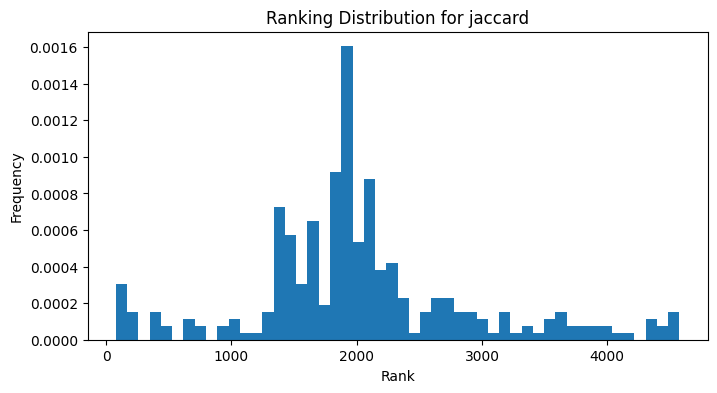


Testing adamic_adar:

Final ranks for each edge: [23, 556, 60, 2, 24, 7, 2, 19, 402, 417, 518, 517, 188, 345, 189, 846, 1976, 1722, 116, 1974, 519, 130, 846, 73, 1525, 50, 1537, 1991, 1079, 840, 839, 2005, 2006, 1085, 1085, 1088, 18, 1085, 595, 1084, 2053, 684, 1750, 1751, 2055, 2057, 2055, 2056, 2058, 2061, 1753, 2062, 2067, 2064, 2, 1546, 1100, 1545, 56, 1544, 1546, 188, 101, 352, 2064, 21, 124, 1545, 651, 854, 1547, 2065, 1105, 1105, 299, 1546, 1104, 132, 689, 1547, 2065, 2, 2, 5, 516, 565, 1104, 1749, 2067, 103, 98, 469, 1342, 774, 1103, 1748, 1104, 513, 810, 1749, 2072, 809, 361, 1750, 1107, 201, 73, 29, 1533, 14, 1114, 203, 223, 618, 130, 2081, 1115, 2082, 852, 856, 2083, 1119, 2087, 2085, 2085, 367, 1537, 2090, 859, 1543, 259, 52, 1540, 134, 1545, 1216, 98, 679, 270, 190, 1547, 187, 1544, 224, 1329, 1220, 125, 1551, 693, 2112, 316, 2117, 1341, 2124, 2126, 337, 1568, 556, 2134, 2147, 2153, 2163, 2176, 1125, 2176, 2177, 2184, 2188, 1130, 2188, 2190, 2194, 102, 317, 2244, 2239, 22

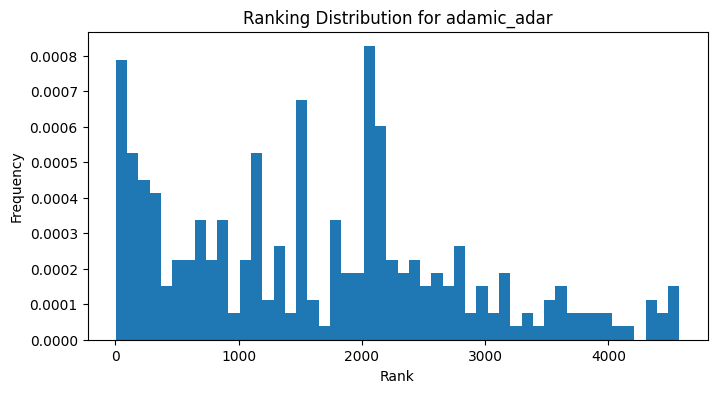

Analyzing graph with 100 nodes and 291 edges
Calculating entropy for real graph...
Creating random graph and calculating its entropy...
Created random graph with 291 edges (original had 291)

Results:
Real graph entropy: 4.63982693411977
Random graph entropy: 5.415099028186787


{'graph_stats': {'nodes': 100, 'edges': 291},
 'real_graph': {'entropy': 4.63982693411977},
 'random_graph': {'entropy': 5.415099028186787}}

In [8]:

# Create a simple test graph
G =  nx.barabasi_albert_graph(n=100, m=3, seed=42)  # 100 nodes, each new node adds 3 edges

plt.figure(figsize=(8,6))
nx.draw(G, with_labels=True, node_color='lightblue', 
        node_size=500, font_size=16)
plt.title("Test Graph")
plt.show()


# Get number of nodes for entropy calculation
N = G.number_of_nodes()

# Test all methods and calculate their entropies
for predictor in ['jaccard', 'adamic_adar']:
    print(f"\nTesting {predictor}:")
    ranks = elp.evaluate_link_prediction(G, predictor=predictor)
    entropy = elp.calculate_entropy(ranks, N)
    
    print(f"\nFinal ranks for each edge: {ranks}")
    print(f"Entropy of the ranking distribution: {entropy}")
    
    # Visualize the ranking distribution
    plt.figure(figsize=(8,4))
    plt.hist(ranks, bins=N//2, density=True)
    plt.title(f"Ranking Distribution for {predictor}")
    plt.xlabel("Rank")
    plt.ylabel("Frequency")
    plt.show()
    
elp.compare_real_vs_random(G)

Analyzing graph with 182 nodes and 363 edges
Calculating entropy for real graph...
Creating random graph and calculating its entropy...
Created random graph with 365 edges (original had 363)

Results:
Real graph entropy: 5.331545635099708
Random graph entropy: 6.272708188848719
Analyzing graph with 91 nodes and 200 edges
Calculating entropy for real graph...
Creating random graph and calculating its entropy...
Created random graph with 202 edges (original had 200)

Results:
Real graph entropy: 4.872764060302878
Random graph entropy: 5.2456593338440385


{'graph_stats': {'nodes': 91, 'edges': 200},
 'real_graph': {'entropy': 4.872764060302878},
 'random_graph': {'entropy': 5.2456593338440385}}

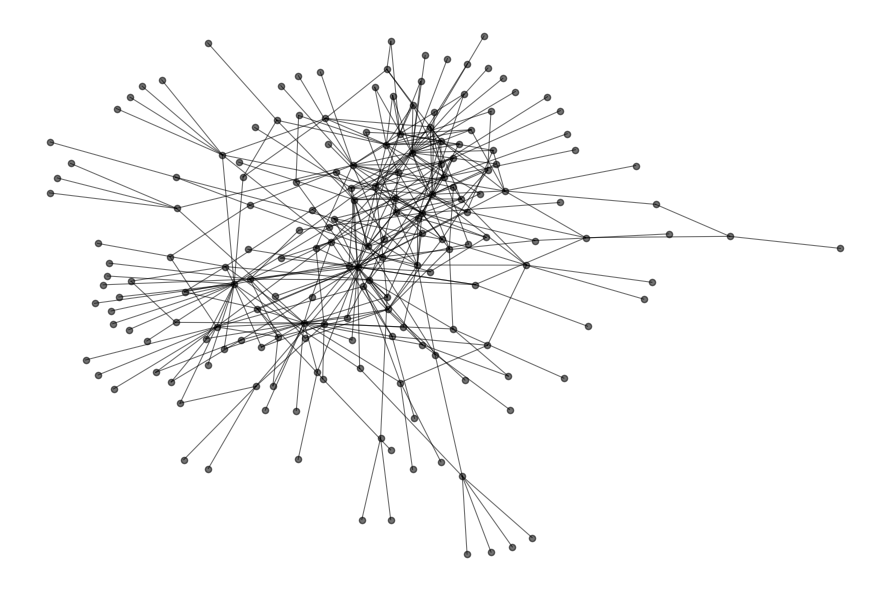

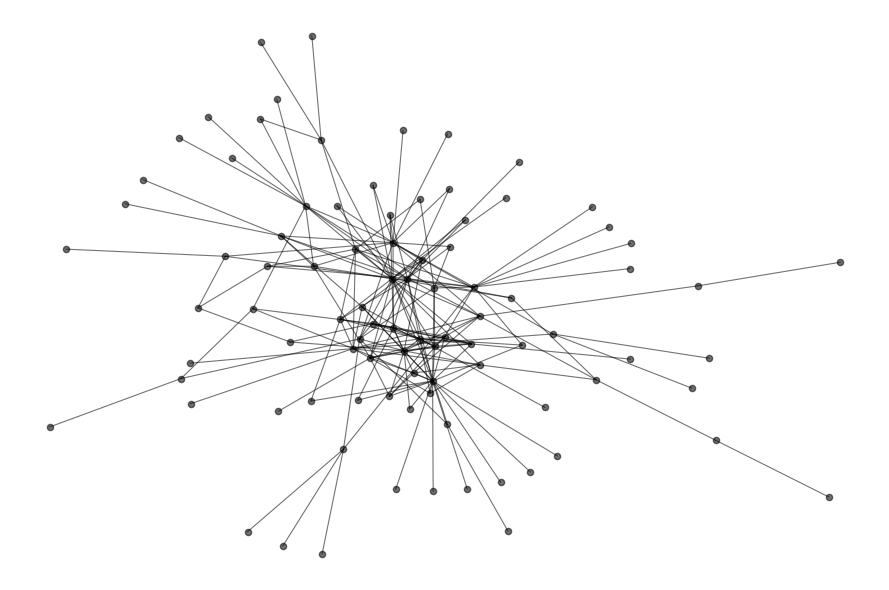

In [17]:
with open('undirected_networks.pkl', 'rb') as f:
    networks_df = pickle.load(f)

# Take the first graph as example
#print(networks_df.iloc[1])

def create_networkx_graph(row):
    """Create a NetworkX graph from a row of the dataset."""
    is_directed = 'Directed' in row['graphProperties']
    G = nx.DiGraph() if is_directed else nx.Graph()
    
    nodes = np.array(row['nodes_id'])
    edges = np.array(row['edges_id'])
    
    G.add_nodes_from(nodes)
    G.add_edges_from(edges)
    
    return G
G = create_networkx_graph(networks_df.iloc[1])
cu.plot_graph(G)


W = nx.to_scipy_sparse_array(G)
G_w = graphs.Graph(W)

# Calculate reduction ratio
r = 1 - (50/100)

C, Gc, Call, Gall = coarsen(G_w, K=10, r=r)
G_reduced = nx.from_scipy_sparse_array(Gc.W)

cu.plot_graph(G_reduced)

elp.compare_real_vs_random(G)
elp.compare_real_vs_random(G_reduced)

## 2. Network Selection for Comprehensive Analysis

To evaluate the relationship between structural complexity and link predictability across network families, we selected a representative subset of 60 networks from our corpus of 439 undirected graphs. The sampling was designed to ensure adequate representation across four major network domains while controlling for network size to maintain computational feasibility.

**Sampling Criteria:**

We applied stratified random sampling with the following constraints:

- **Biological networks**: 15 networks, 100-1000 nodes
- **Social networks**: 15 networks, 300-500 nodes  
- **Economic networks**: 15 networks, 100-1000 nodes
- **Transportation networks**: 15 networks, 100-500 nodes

These size ranges were chosen to balance several considerations: (1) networks large enough to exhibit meaningful structural complexity, (2) computational tractability for leave-one-out link prediction across multiple reduction scales, and (3) sufficient sample size within each domain to capture domain-specific entropy patterns.

For each domain, we randomly sampled networks meeting the size criteria using a fixed random seed (`random_state=42`) to ensure reproducibility. The final sample contains 60 networks spanning diverse topologies and application domains.

**Sample Validation:**

After selection, we verified that the sampled networks:
- Covered the expected node count ranges within each domain
- Included diverse network subtypes (e.g., food webs, protein interactions, metabolic networks in the biological domain)
- Maintained sufficient edge density for meaningful link prediction analysis

The curated sample was serialized to `Final_sampled_networks.pkl` to ensure exact reproducibility of all downstream analyses.


In [7]:
with open('undirected_networks.pkl', 'rb') as f:
    networks_df = pickle.load(f)

def sample_networks(df, domain, min_nodes, max_nodes, n_samples=15):
    """
    Sample networks from a specific domain with node constraints
    
    Parameters:
    -----------
    df : pandas.DataFrame
        The dataframe containing network information
    domain : str
        The network domain to filter by
    min_nodes : int
        Minimum number of nodes required
    max_nodes : int
        Maximum number of nodes allowed
    n_samples : int
        Number of networks to sample (default 10)
        
    Returns:
    --------
    pandas.DataFrame
        Sampled networks meeting the criteria
    """
    # Filter by domain and node count
    mask = (df['networkDomain'] == domain) & \
           (df['number_nodes'] >= min_nodes) & \
           (df['number_nodes'] <= max_nodes)
    
    filtered_df = df[mask]
    
    # Check if we have enough networks meeting criteria
    available_samples = len(filtered_df)
    if available_samples < n_samples:
        print(f"Warning: Only {available_samples} networks available for {domain} "
              f"with {min_nodes}-{max_nodes} nodes. Returning all available.")
        return filtered_df
    
    # Sample randomly
    return filtered_df.sample(n=n_samples, random_state=42)  # Set random_state for reproducibility

# Sample networks according to the criteria
economic_samples = sample_networks(networks_df, 'Economic', 100, 1000)
transport_samples = sample_networks(networks_df, 'Transportation', 100, 500)
social_samples = sample_networks(networks_df, 'Social', 300, 500)
biological_samples = sample_networks(networks_df, 'Biological', 100, 1000)

# Print summary of samples
for domain, samples in [('Economic', economic_samples),
                       ('Transportation', transport_samples),
                       ('Social', social_samples),
                       ('Biological', biological_samples)]:
    print(f"\n{domain} Networks:")
    print(f"Number of samples: {len(samples)}")
    if len(samples) > 0:
        print("Node count range:", samples['number_nodes'].min(), "-", samples['number_nodes'].max())
        print("\nSample networks:")
        print(samples[['title', 'number_nodes', 'number_edges']].to_string())
    else:
        print("No networks found matching criteria")

# Combine all samples into a single DataFrame
all_samples = pd.concat([economic_samples, transport_samples, social_samples, biological_samples])
print("\nTotal networks sampled:", len(all_samples))

# Reset the index to make it sequential
all_samples = all_samples.reset_index(drop=True)

# Save the sampled networks to a new pickle file
output_filename = 'Final_sampled_networks.pkl'
with open(output_filename, 'wb') as f:
    pickle.dump(all_samples, f)
print(f"\nSaved sampled networks to {output_filename}")

# Verify the saved file
with open(output_filename, 'rb') as f:
    loaded_samples = pickle.load(f)
print("Verification: loaded pickle file has", len(loaded_samples), "networks")


Economic Networks:
Number of samples: 15
Node count range: 179 - 990

Sample networks:
                                                    title  number_nodes  number_edges
360  Norwegian Boards of Directors (2002-2011, bipartite)           985          1070
254  Norwegian Boards of Directors (2002-2011, bipartite)           179           184
349  Norwegian Boards of Directors (2002-2011, bipartite)           971          1046
276  Norwegian Boards of Directors (2002-2011, bipartite)           470           489
266  Norwegian Boards of Directors (2002-2011, bipartite)           402           405
450             Dutch corporate boards (1976, 1996, 2001)           180           945
264  Norwegian Boards of Directors (2002-2011, bipartite)           401           403
272  Norwegian Boards of Directors (2002-2011, bipartite)           480           496
258  Norwegian Boards of Directors (2002-2011, bipartite)           369           375
347  Norwegian Boards of Directors (2002-2011, bipar

In [6]:
with open('Final_sampled_networks.pkl', 'rb') as f:
    sampled_graphs = pickle.load(f)
## get different nertwork domains
sampled_graphs['networkDomain'].unique()
print(sampled_graphs)

    network_index                                       network_name  \
0             360   Norwegian_Board_of_Directors_net2mode_2011-04-01   
1             254   Norwegian_Board_of_Directors_net2mode_2002-05-01   
2             349   Norwegian_Board_of_Directors_net2mode_2010-05-01   
3             276   Norwegian_Board_of_Directors_net2mode_2004-03-01   
4             266   Norwegian_Board_of_Directors_net2mode_2003-05-01   
5             450                           5936021067ec90f1500d6599   
6             264   Norwegian_Board_of_Directors_net2mode_2003-03-01   
7             272   Norwegian_Board_of_Directors_net2mode_2003-11-01   
8             258   Norwegian_Board_of_Directors_net2mode_2002-09-01   
9             347   Norwegian_Board_of_Directors_net2mode_2010-03-01   
10            294   Norwegian_Board_of_Directors_net2mode_2005-10-01   
11            301   Norwegian_Board_of_Directors_net2mode_2006-05-01   
12            289   Norwegian_Board_of_Directors_net2mode_2005-0

## 3. Comprehensive Multiscale Entropy Experiment

**⚠️ Computational Cost Disclaimer:**

The complete multiscale entropy analysis is computationally intensive. For each of the 60 networks, we performed:
- Spectral graph reduction at 4 levels (80%, 60%, 40%, 20%)
- Leave-one-out link prediction for every edge using two similarity metrics
- Generation and analysis of 10 matched random graphs for normalization
- Compression-based entropy calculation at each scale

**The total computational pipeline required approximately one week of processing time** on standard hardware. Researchers planning to replicate or extend this analysis should allocate computational resources accordingly. The main bottleneck is the leave-one-out link prediction procedure, which has complexity O(E × N²) where E is the number of edges and N is the number of nodes.

**Experimental Protocol:**

For each sampled network, we computed entropy measures at five reduction levels using the spectral graph coarsening framework. The reduction levels correspond to preserving 100%, 80%, 60%, 40%, and 20% of the original nodes.

**Two complementary entropy measures were calculated at each scale:**

1. **Compression-based structural entropy** (L*): Following the SZIP encoding and arithmetic compression procedure, we quantified the compressibility of the graph structure. This measure captures global structural regularity and redundancy.

2. **Link prediction entropy** (H*): Using leave-one-out cross-validation with two classical similarity heuristics—Jaccard coefficient and Adamic-Adar index—we computed the uncertainty in predicting held-out edges. This measure quantifies structural predictability.

Both entropy measures were normalized using matched Erdős-Rényi random graphs. For each original network, we generated 10 random graphs with identical node count and edge density, computing the average entropy as a baseline for normalization.

**Output Data Structure:**

The results were compiled into a structured JSON file (`graph_families_multi_entropy_analysis.json`) with the following hierarchical organization:
```
{
  "Domain": {
    "Network_Name": {
      "Name": "...",
      "Subdomain": "...",
      "Node_Type": "...",
      "Edge_Type": "...",
      "reductions": {
        "100": {
          "graph_portion": 100,
          "number_nodes": ...,
          "number_edges": ...,
          "entropy_arithmetic": {...},
          "entropy_linkPrediction_Jaccard": {...},
          "entropy_linkPrediction_AdamicAdar": {...}
        },
        "80": {...},
        "60": {...},
        "40": {...},
        "20": {...}
      }
    }
  }
}
```

Each entropy metric contains three values:
- `graph`: Raw entropy value for the network
- `random`: Average entropy of matched random graphs
- `normalized`: Ratio of graph entropy to random baseline

This comprehensive data structure enables systematic analysis of entropy trajectories across scales, comparison of entropy measures, and investigation of domain-specific patterns in structural complexity and predictability.

**Quality Control:**

Throughout the experiment, we implemented several safeguards:
- Automated validation of reduction quality (ensuring coarsened graphs met target sizes)
- Error handling for edge cases (e.g., disconnected components after reduction)
- Logging of failed reductions or entropy calculations
- Verification that random graphs maintained edge density within ±1% of the original

Networ

In [4]:
import pickle
import networkx as nx
import numpy as np
from pygsp import graphs
import json
from collections import defaultdict
from tqdm import tqdm

def create_networkx_graph(row):
    """Create a NetworkX graph from a row of the dataset."""
    is_directed = 'Directed' in row['graphProperties']
    G = nx.DiGraph() if is_directed else nx.Graph()
    
    nodes = np.array(row['nodes_id'])
    edges = np.array(row['edges_id'])
    
    G.add_nodes_from(nodes)
    G.add_edges_from(edges)
    
    return G

def calculate_graph_metrics(G_nx):
    """Calculate basic metrics for a graph."""
    return {
        'number_nodes': G_nx.number_of_nodes(),
        'number_edges': G_nx.number_of_edges(),
        'ave_degree': 2 * G_nx.number_of_edges() / G_nx.number_of_nodes()
    }

def calculate_entropies(G_nx):
    """Calculate all entropy metrics."""
    # Original arithmetic encoding entropy
    entropy_metrics = cu.get_entropy_metadata_aritmethicEncoding(G_nx)
    
    # Jaccard link prediction entropy
    jaccard_results = compare_real_vs_random(G_nx, predictor='jaccard')
    
    # Adamic-Adar link prediction entropy
    adamic_results = compare_real_vs_random(G_nx, predictor='adamic_adar')
    
    # Combine results
    if jaccard_results is not None and adamic_results is not None:
        return {
            'entropy_arithmetic': {
                'graph': entropy_metrics['Grafo'],
                'random': entropy_metrics['Grafo_r'],
                'normalized': entropy_metrics['Entropy Normalizado']
            },
            'entropy_linkPrediction_Jaccard': {
                'graph': jaccard_results['real_graph']['entropy'],
                'random': jaccard_results['random_graph']['entropy'],
                'normalized': jaccard_results['real_graph']['entropy'] / jaccard_results['random_graph']['entropy']
                           if jaccard_results['random_graph']['entropy'] != 0 else None
            },
            'entropy_linkPrediction_AdamicAdar': {
                'graph': adamic_results['real_graph']['entropy'],
                'random': adamic_results['random_graph']['entropy'],
                'normalized': adamic_results['real_graph']['entropy'] / adamic_results['random_graph']['entropy']
                           if adamic_results['random_graph']['entropy'] != 0 else None
            }
        }
    else:
        return {
            'entropy_arithmetic': {
                'graph': entropy_metrics['Grafo'],
                'random': entropy_metrics['Grafo_r'],
                'normalized': entropy_metrics['Entropy Normalizado']
            },
            'entropy_linkPrediction_Jaccard': {
                'graph': None,
                'random': None,
                'normalized': None
            },
            'entropy_linkPrediction_AdamicAdar': {
                'graph': None,
                'random': None,
                'normalized': None
            }
        }

def process_graph_at_reduction(G_nx, reduction_percent):
    """Process a graph at a specific reduction percentage."""
    # Convert to PyGSP format
    W = nx.to_scipy_sparse_array(G_nx)
    G = graphs.Graph(W)
    
    # Calculate reduction ratio
    r = 1 - (reduction_percent/100)
    
    if reduction_percent == 100:
        # Original graph, no reduction needed
        G_reduced = G_nx
    else:
        # Perform coarsening
        try:
            C, Gc, Call, Gall = coarsen(G, K=10, r=r)
            G_reduced = nx.from_scipy_sparse_array(Gc.W)
        except Exception as e:
            print(f"Error in coarsening at {reduction_percent}%: {str(e)}")
            return None
    
    # Calculate metrics and entropies
    metrics = calculate_graph_metrics(G_reduced)
    entropies = calculate_entropies(G_reduced)
    
    # Combine all information
    return {
        'graph_portion': reduction_percent,
        **metrics,
        **entropies
    }

def create_graph_family_json(df):
    """Create the complete JSON structure for all graph families."""
    result = defaultdict(lambda: defaultdict(dict))
    
    # Process each row in the dataframe
    for _, row in tqdm(df.iterrows(), total=len(df)):
        family = row['networkDomain']
        if not isinstance(family, str):
            continue
            
        graph_data = {
            'Name': row['network_name'],
            'Subdomain': row['subDomain'],
            'Node_Type': row['nodeType'],
            'Edge_Type': row['edgeType'],
            'reductions': {}
        }
        
        # Create NetworkX graph
        G_nx = create_networkx_graph(row)
        
        # Process each reduction percentage
        for reduction in [100, 80, 60, 40, 20]:
            reduction_data = process_graph_at_reduction(G_nx, reduction)
            if reduction_data:
                graph_data['reductions'][str(reduction)] = reduction_data
        
        # Add to result
        result[family][row['network_name']] = graph_data
    
    return dict(result)

# Load the data
with open('Final_sampled_networks.pkl', 'rb') as f:
    real_graphs = pickle.load(f)

# Process all graphs and create JSON
graph_families = create_graph_family_json(real_graphs)

# Save to JSON file with new name to distinguish from original
with open('graph_families_multi_entropy_analysis.json', 'w') as f:
    json.dump(graph_families, f, indent=2)

print("Available network domains:", list(graph_families.keys()))
for domain in graph_families:
    print(f"\n{domain} networks:", list(graph_families[domain].keys()))

  0%|          | 0/60 [00:00<?, ?it/s]

Generated 10 random graphs with ±1% error margin (1070 target edges)
985
1070
Entropia de grafo: 4397, Entropía B1 +B2 : 4342 y tamaño de la codificación: 54681
985
1065
985
1064
985
1065
985
1079
985
1059
985
1079
985
1071
985
1059
985
1073
985
1074
Entropia promedio de grafos random: 6633.40, Entropia B1+B2 promedio: 6329.40 y tamaño promedio de la codificación: 99373.30
Analyzing graph with 985 nodes and 1070 edges
Calculating entropy for real graph...
Creating random graph and calculating its entropy...
Created random graph with 1061 edges (original had 1070)

Results:
Real graph entropy: 7.384518460501625
Random graph entropy: 8.602224827647305
Analyzing graph with 985 nodes and 1070 edges
Calculating entropy for real graph...
Creating random graph and calculating its entropy...
Created random graph with 1072 edges (original had 1070)

Results:
Real graph entropy: 7.384518460501625
Random graph entropy: 8.556389822529301
Generated 10 random graphs with ±1% error margin (852 target

  2%|▏         | 1/60 [12:09:56<717:46:27, 43796.41s/it]


Results:
Real graph entropy: 6.198262362091651
Random graph entropy: 6.385671718182786
Generated 10 random graphs with ±1% error margin (184 target edges)
179
184
Entropia de grafo: 470, Entropía B1 +B2 : 471 y tamaño de la codificación: 2993
179
184
179
183
179
185
179
183
179
183
179
184
179
183
179
183
179
182
179
184
Entropia promedio de grafos random: 847.30, Entropia B1+B2 promedio: 810.10 y tamaño promedio de la codificación: 3904.90
Analyzing graph with 179 nodes and 184 edges
Calculating entropy for real graph...
Creating random graph and calculating its entropy...
Created random graph with 185 edges (original had 184)

Results:
Real graph entropy: 4.226923309781651
Random graph entropy: 6.056034723651806
Analyzing graph with 179 nodes and 184 edges
Calculating entropy for real graph...
Creating random graph and calculating its entropy...
Created random graph with 183 edges (original had 184)

Results:
Real graph entropy: 4.226923309781651
Random graph entropy: 6.080613534918

  3%|▎         | 2/60 [12:14:14<292:59:23, 18185.57s/it]

Creating random graph and calculating its entropy...
Created random graph with 39 edges (original had 40)

Results:
Real graph entropy: 3.6093407582869146
Random graph entropy: 3.6063267456477863
Generated 10 random graphs with ±1% error margin (1046 target edges)
971
1046
Entropia de grafo: 4112, Entropía B1 +B2 : 4066 y tamaño de la codificación: 49569
971
1040
971
1044
971
1055
971
1041
971
1048
971
1049
971
1042
971
1048
971
1037
971
1056
Entropia promedio de grafos random: 6445.60, Entropia B1+B2 promedio: 6126.50 y tamaño promedio de la codificación: 94252.00
Analyzing graph with 971 nodes and 1046 edges
Calculating entropy for real graph...
Creating random graph and calculating its entropy...
Created random graph with 1040 edges (original had 1046)

Results:
Real graph entropy: 7.350054711671651
Random graph entropy: 8.53827899436407
Analyzing graph with 971 nodes and 1046 edges
Calculating entropy for real graph...
Creating random graph and calculating its entropy...
Created ra

  5%|▌         | 3/60 [23:48:12<457:29:51, 28894.59s/it]


Results:
Real graph entropy: 6.143425766108143
Random graph entropy: 6.236509985184787
Generated 10 random graphs with ±1% error margin (489 target edges)
470
489
Entropia de grafo: 1491, Entropía B1 +B2 : 1468 y tamaño de la codificación: 12501
470
487
470
492
470
485
470
484
470
485
470
491
470
485
470
485
470
491
470
489
Entropia promedio de grafos random: 2658.00, Entropia B1+B2 promedio: 2528.80 y tamaño promedio de la codificación: 22190.30
Analyzing graph with 470 nodes and 489 edges
Calculating entropy for real graph...
Creating random graph and calculating its entropy...
Created random graph with 487 edges (original had 489)

Results:
Real graph entropy: 5.943151252770608
Random graph entropy: 7.535588075975459
Analyzing graph with 470 nodes and 489 edges
Calculating entropy for real graph...
Creating random graph and calculating its entropy...
Created random graph with 485 edges (original had 489)

Results:
Real graph entropy: 5.943151252770608
Random graph entropy: 7.503526

  7%|▋         | 4/60 [24:51:40<295:24:27, 18990.49s/it]


Results:
Real graph entropy: 5.029685202407776
Random graph entropy: 5.185576043622236
Generated 10 random graphs with ±1% error margin (405 target edges)
402
405
Entropia de grafo: 1135, Entropía B1 +B2 : 1121 y tamaño de la codificación: 7160
402
404
402
401
402
408
402
406
402
401
402
409
402
403
402
404
402
401
402
409
Entropia promedio de grafos random: 2128.90, Entropia B1+B2 promedio: 2029.00 y tamaño promedio de la codificación: 16122.10
Analyzing graph with 402 nodes and 405 edges
Calculating entropy for real graph...
Creating random graph and calculating its entropy...
Created random graph with 409 edges (original had 405)

Results:
Real graph entropy: 5.752803120360414
Random graph entropy: 7.258837353491836
Analyzing graph with 402 nodes and 405 edges
Calculating entropy for real graph...
Creating random graph and calculating its entropy...
Created random graph with 404 edges (original had 405)

Results:
Real graph entropy: 5.752803120360414
Random graph entropy: 7.2052118

  8%|▊         | 5/60 [25:30:26<198:19:35, 12981.37s/it]


Results:
Real graph entropy: 4.808614510041564
Random graph entropy: 4.754011269371211
Generated 10 random graphs with ±1% error margin (945 target edges)
180
945
Entropia de grafo: 4103, Entropía B1 +B2 : 4097 y tamaño de la codificación: 11461
180
947
180
936
180
942
180
938
180
951
180
935
180
945
180
942
180
942
180
951
Entropia promedio de grafos random: 4400.30, Entropia B1+B2 promedio: 4373.80 y tamaño promedio de la codificación: 12814.80
Analyzing graph with 180 nodes and 945 edges
Calculating entropy for real graph...
Creating random graph and calculating its entropy...
Created random graph with 949 edges (original had 945)

Results:
Real graph entropy: 4.127810287042081
Random graph entropy: 6.327453422301708
Analyzing graph with 180 nodes and 945 edges
Calculating entropy for real graph...
Creating random graph and calculating its entropy...
Created random graph with 948 edges (original had 945)

Results:
Real graph entropy: 3.8131146158757816
Random graph entropy: 6.33078

 10%|█         | 6/60 [26:00:04<137:34:46, 9171.98s/it] 


Results:
Real graph entropy: 2.2716410002917864
Random graph entropy: 3.759456113478409
Generated 10 random graphs with ±1% error margin (403 target edges)
401
403
Entropia de grafo: 1126, Entropía B1 +B2 : 1111 y tamaño de la codificación: 7269
401
402
401
405
401
403
401
403
401
400
401
400
401
399
401
400
401
402
401
398
Entropia promedio de grafos random: 2110.70, Entropia B1+B2 promedio: 2000.00 y tamaño promedio de la codificación: 15018.40
Analyzing graph with 401 nodes and 403 edges
Calculating entropy for real graph...
Creating random graph and calculating its entropy...
Created random graph with 402 edges (original had 403)

Results:
Real graph entropy: 5.727678459808388
Random graph entropy: 7.213756722322319
Analyzing graph with 401 nodes and 403 edges
Calculating entropy for real graph...
Creating random graph and calculating its entropy...
Created random graph with 406 edges (original had 403)

Results:
Real graph entropy: 5.727678459808388
Random graph entropy: 7.243133

 12%|█▏        | 7/60 [26:38:02<101:51:14, 6918.39s/it]


Results:
Real graph entropy: 4.797950583260166
Random graph entropy: 4.967522651081272
Generated 10 random graphs with ±1% error margin (496 target edges)
480
496
Entropia de grafo: 1527, Entropía B1 +B2 : 1494 y tamaño de la codificación: 12747
480
495
480
491
480
491
480
499
480
493
480
493
480
496
480
492
480
498
480
495
Entropia promedio de grafos random: 2703.80, Entropia B1+B2 promedio: 2577.50 y tamaño promedio de la codificación: 23026.60
Analyzing graph with 480 nodes and 496 edges
Calculating entropy for real graph...
Creating random graph and calculating its entropy...
Created random graph with 500 edges (original had 496)

Results:
Real graph entropy: 5.9964143841555595
Random graph entropy: 7.494270431035224
Analyzing graph with 480 nodes and 496 edges
Calculating entropy for real graph...
Creating random graph and calculating its entropy...
Created random graph with 495 edges (original had 496)

Results:
Real graph entropy: 5.9964143841555595
Random graph entropy: 7.4941

 13%|█▎        | 8/60 [27:48:13<87:28:51, 6056.37s/it] 


Results:
Real graph entropy: 5.108110570239935
Random graph entropy: 5.05499561098558
Generated 10 random graphs with ±1% error margin (375 target edges)
369
375
Entropia de grafo: 1011, Entropía B1 +B2 : 995 y tamaño de la codificación: 6121
369
374
369
373
369
376
369
371
369
371
369
374
369
371
369
373
369
378
369
376
Entropia promedio de grafos random: 1930.30, Entropia B1+B2 promedio: 1841.00 y tamaño promedio de la codificación: 13389.70
Analyzing graph with 369 nodes and 375 edges
Calculating entropy for real graph...
Creating random graph and calculating its entropy...
Created random graph with 374 edges (original had 375)

Results:
Real graph entropy: 5.561458984836373
Random graph entropy: 7.09384661009808
Analyzing graph with 369 nodes and 375 edges
Calculating entropy for real graph...
Creating random graph and calculating its entropy...
Created random graph with 374 edges (original had 375)

Results:
Real graph entropy: 5.561458984836373
Random graph entropy: 7.0918787864

 15%|█▌        | 9/60 [28:18:37<67:03:12, 4733.19s/it]


Results:
Real graph entropy: 4.784001448099094
Random graph entropy: 4.786965817330313
Generated 10 random graphs with ±1% error margin (1045 target edges)
969
1045
Entropia de grafo: 4290, Entropía B1 +B2 : 4247 y tamaño de la codificación: 60217
969
1040
969
1041
969
1047
969
1046
969
1037
969
1035
969
1041
969
1047
969
1036
969
1055
Entropia promedio de grafos random: 6433.90, Entropia B1+B2 promedio: 6133.30 y tamaño promedio de la codificación: 95244.80
Analyzing graph with 969 nodes and 1045 edges
Calculating entropy for real graph...
Creating random graph and calculating its entropy...
Created random graph with 1051 edges (original had 1045)

Results:
Real graph entropy: 7.348055637455191
Random graph entropy: 8.50028270758799
Analyzing graph with 969 nodes and 1045 edges
Calculating entropy for real graph...
Creating random graph and calculating its entropy...
Created random graph with 1054 edges (original had 1045)

Results:
Real graph entropy: 7.348055637455191
Random graph 

 17%|█▋        | 10/60 [38:50:04<207:53:55, 14968.70s/it]


Results:
Real graph entropy: 6.293823705868921
Random graph entropy: 6.233867300623524
Generated 10 random graphs with ±1% error margin (531 target edges)
492
531
Entropia de grafo: 1888, Entropía B1 +B2 : 1861 y tamaño de la codificación: 20759
492
528
492
535
492
531
492
525
492
534
492
536
492
534
492
525
492
527
492
530
Entropia promedio de grafos random: 2948.10, Entropia B1+B2 promedio: 2818.30 y tamaño promedio de la codificación: 26965.30
Analyzing graph with 492 nodes and 531 edges
Calculating entropy for real graph...
Creating random graph and calculating its entropy...
Created random graph with 535 edges (original had 531)

Results:
Real graph entropy: 6.202520935090812
Random graph entropy: 7.594244132183896
Analyzing graph with 492 nodes and 531 edges
Calculating entropy for real graph...
Creating random graph and calculating its entropy...
Created random graph with 536 edges (original had 531)

Results:
Real graph entropy: 6.202520935090812
Random graph entropy: 7.571285

 18%|█▊        | 11/60 [40:08:09<160:54:02, 11821.28s/it]


Results:
Real graph entropy: 5.107031763712958
Random graph entropy: 5.382921922729766
Generated 10 random graphs with ±1% error margin (658 target edges)
610
658
Entropia de grafo: 2244, Entropía B1 +B2 : 2217 y tamaño de la codificación: 19632
610
661
610
663
610
664
610
654
610
663
610
653
610
656
610
652
610
664
610
655
Entropia promedio de grafos random: 3774.70, Entropia B1+B2 promedio: 3608.60 y tamaño promedio de la codificación: 39117.30
Analyzing graph with 610 nodes and 658 edges
Calculating entropy for real graph...
Creating random graph and calculating its entropy...
Created random graph with 663 edges (original had 658)

Results:
Real graph entropy: 6.590393840957645
Random graph entropy: 7.849224301024073
Analyzing graph with 610 nodes and 658 edges
Calculating entropy for real graph...
Creating random graph and calculating its entropy...
Created random graph with 663 edges (original had 658)

Results:
Real graph entropy: 6.590393840957645
Random graph entropy: 7.859709

 20%|██        | 12/60 [42:35:22<145:29:43, 10912.16s/it]


Results:
Real graph entropy: 5.25827459910138
Random graph entropy: 5.645684067373143
Generated 10 random graphs with ±1% error margin (578 target edges)
548
578
Entropia de grafo: 1847, Entropía B1 +B2 : 1826 y tamaño de la codificación: 13301
548
581
548
579
548
573
548
574
548
583
548
576
548
574
548
572
548
576
548
579
Entropia promedio de grafos random: 3216.70, Entropia B1+B2 promedio: 3054.90 y tamaño promedio de la codificación: 28598.90
Analyzing graph with 548 nodes and 578 edges
Calculating entropy for real graph...
Creating random graph and calculating its entropy...
Created random graph with 582 edges (original had 578)

Results:
Real graph entropy: 6.2576071303713565
Random graph entropy: 7.724650017686534
Analyzing graph with 548 nodes and 578 edges
Calculating entropy for real graph...
Creating random graph and calculating its entropy...
Created random graph with 580 edges (original had 578)

Results:
Real graph entropy: 6.2576071303713565
Random graph entropy: 7.65916

 22%|██▏       | 13/60 [44:19:31<124:01:15, 9499.49s/it] 


Results:
Real graph entropy: 5.217565313562593
Random graph entropy: 5.369838160350899
Generated 10 random graphs with ±1% error margin (1073 target edges)
990
1073
Entropia de grafo: 4389, Entropía B1 +B2 : 4319 y tamaño de la codificación: 64970
990
1070
990
1079
990
1072
990
1072
990
1077
990
1069
990
1069
990
1069
990
1063
990
1070
Entropia promedio de grafos random: 6660.10, Entropia B1+B2 promedio: 6359.60 y tamaño promedio de la codificación: 100946.20
Analyzing graph with 990 nodes and 1073 edges
Calculating entropy for real graph...
Creating random graph and calculating its entropy...
Created random graph with 1073 edges (original had 1073)

Results:
Real graph entropy: 7.388738793052912
Random graph entropy: 8.565776884503286
Analyzing graph with 990 nodes and 1073 edges
Calculating entropy for real graph...
Creating random graph and calculating its entropy...
Created random graph with 1074 edges (original had 1073)

Results:
Real graph entropy: 7.388738793052912
Random grap

 23%|██▎       | 14/60 [55:25:18<238:53:40, 18696.10s/it]


Results:
Real graph entropy: 6.039518608641197
Random graph entropy: 6.282426392423879
Generated 10 random graphs with ±1% error margin (859 target edges)
795
859
Entropia de grafo: 2965, Entropía B1 +B2 : 2922 y tamaño de la codificación: 28658
795
866
795
860
795
861
795
860
795
852
795
862
795
859
795
851
795
865
795
856
Entropia promedio de grafos random: 5148.80, Entropia B1+B2 promedio: 4915.30 y tamaño promedio de la codificación: 65216.90
Analyzing graph with 795 nodes and 859 edges
Calculating entropy for real graph...
Creating random graph and calculating its entropy...
Created random graph with 856 edges (original had 859)

Results:
Real graph entropy: 6.960651852924942
Random graph entropy: 8.234435831140914
Analyzing graph with 795 nodes and 859 edges
Calculating entropy for real graph...
Creating random graph and calculating its entropy...
Created random graph with 856 edges (original had 859)

Results:
Real graph entropy: 6.960651852924942
Random graph entropy: 8.233314

 25%|██▌       | 15/60 [61:13:19<241:55:57, 19354.62s/it]


Results:
Real graph entropy: 5.950904800095034
Random graph entropy: 5.819220064696991
Generated 10 random graphs with ±1% error margin (2980 target edges)
500
2980
Entropia de grafo: 11885, Entropía B1 +B2 : 11748 y tamaño de la codificación: 61633
500
2959
500
2997
500
2992
500
2983
500
2983
500
2956
500
3009
500
2996
500
2980
500
2958
Entropia promedio de grafos random: 17681.40, Entropia B1+B2 promedio: 17560.30 y tamaño promedio de la codificación: 100245.00
Analyzing graph with 500 nodes and 2980 edges
Calculating entropy for real graph...
Creating random graph and calculating its entropy...
Created random graph with 2995 edges (original had 2980)

Results:
Real graph entropy: 5.565457942866661
Random graph entropy: 7.8581753960538325
Analyzing graph with 500 nodes and 2980 edges
Calculating entropy for real graph...
Creating random graph and calculating its entropy...
Created random graph with 2999 edges (original had 2980)

Results:
Real graph entropy: 3.7545739259703583
Rando

 27%|██▋       | 16/60 [76:38:09<369:29:48, 30231.55s/it]


Results:
Real graph entropy: 2.5413294166535563
Random graph entropy: 5.393066808744611
Generated 10 random graphs with ±1% error margin (430 target edges)
369
430
Entropia de grafo: 2139, Entropía B1 +B2 : 1975 y tamaño de la codificación: 8532
369
430
369
425
369
433
369
430
369
428
369
425
369
434
369
429
369
427
369
427
Entropia promedio de grafos random: 2319.00, Entropia B1+B2 promedio: 2222.50 y tamaño promedio de la codificación: 17839.40
Analyzing graph with 369 nodes and 430 edges
Calculating entropy for real graph...
Creating random graph and calculating its entropy...
Created random graph with 427 edges (original had 430)

Results:
Real graph entropy: 7.135259175166107
Random graph entropy: 7.192377447731437
Analyzing graph with 369 nodes and 430 edges
Calculating entropy for real graph...
Creating random graph and calculating its entropy...
Created random graph with 433 edges (original had 430)

Results:
Real graph entropy: 7.139153803203472
Random graph entropy: 7.169723

 28%|██▊       | 17/60 [77:17:58<261:05:41, 21859.11s/it]


Results:
Real graph entropy: 4.569695161302114
Random graph entropy: 4.908287478578076
Generated 10 random graphs with ±1% error margin (182 target edges)
170
182
Entropia de grafo: 833, Entropía B1 +B2 : 766 y tamaño de la codificación: 2123
170
183
170
181
170
182
170
182
170
183
170
181
170
182
170
182
170
183
170
180
Entropia promedio de grafos random: 831.70, Entropia B1+B2 promedio: 800.90 y tamaño promedio de la codificación: 3731.00
Analyzing graph with 170 nodes and 182 edges
Calculating entropy for real graph...
Creating random graph and calculating its entropy...
Created random graph with 181 edges (original had 182)

Results:
Real graph entropy: 6.147475102171322
Random graph entropy: 5.998310600557221
Analyzing graph with 170 nodes and 182 edges
Calculating entropy for real graph...
Creating random graph and calculating its entropy...
Created random graph with 180 edges (original had 182)

Results:
Real graph entropy: 6.147475102171322
Random graph entropy: 6.011887491463

 30%|███       | 18/60 [77:21:31<179:08:27, 15354.93s/it]


Results:
Real graph entropy: 3.691700233130651
Random graph entropy: 3.732449797713433
Generated 9 random graphs with ±1% error margin (158 target edges)
148
158
Entropia de grafo: 713, Entropía B1 +B2 : 646 y tamaño de la codificación: 1829
148
157
148
159
148
158
148
157
148
158
148
156
148
156
148
159
148
158
Entropia promedio de grafos random: 703.89, Entropia B1+B2 promedio: 680.11 y tamaño promedio de la codificación: 2873.67
Analyzing graph with 148 nodes and 158 edges
Calculating entropy for real graph...
Creating random graph and calculating its entropy...
Created random graph with 159 edges (original had 158)

Results:
Real graph entropy: 5.900856640834766
Random graph entropy: 5.812206697123368
Analyzing graph with 148 nodes and 158 edges
Calculating entropy for real graph...
Creating random graph and calculating its entropy...
Created random graph with 157 edges (original had 158)

Results:
Real graph entropy: 5.921395327529933
Random graph entropy: 5.711297860365299
Gener

 32%|███▏      | 19/60 [77:23:55<122:50:37, 10786.28s/it]


Results:
Real graph entropy: 3.4426802940149774
Random graph entropy: 3.367812032533445
Generated 10 random graphs with ±1% error margin (475 target edges)
433
475
Entropia de grafo: 2457, Entropía B1 +B2 : 2166 y tamaño de la codificación: 9349
433
479
433
473
433
471
433
477
433
472
433
475
433
476
433
474
433
475
433
472
Entropia promedio de grafos random: 2611.90, Entropia B1+B2 promedio: 2496.60 y tamaño promedio de la codificación: 22249.80
Analyzing graph with 433 nodes and 475 edges
Calculating entropy for real graph...
Creating random graph and calculating its entropy...
Created random graph with 470 edges (original had 475)

Results:
Real graph entropy: 7.452866006555714
Random graph entropy: 7.412299456686616
Analyzing graph with 433 nodes and 475 edges
Calculating entropy for real graph...
Creating random graph and calculating its entropy...
Created random graph with 479 edges (original had 475)

Results:
Real graph entropy: 7.461995715441089
Random graph entropy: 7.334122

 33%|███▎      | 20/60 [78:23:08<95:43:08, 8614.71s/it]  


Results:
Real graph entropy: 5.01452366901573
Random graph entropy: 5.231512655752075
Generated 10 random graphs with ±1% error margin (437 target edges)
392
437
Entropia de grafo: 2196, Entropía B1 +B2 : 2016 y tamaño de la codificación: 7391
392
439
392
435
392
434
392
433
392
433
392
437
392
435
392
441
392
437
392
437
Entropia promedio de grafos random: 2350.50, Entropia B1+B2 promedio: 2248.30 y tamaño promedio de la codificación: 17715.30
Analyzing graph with 392 nodes and 437 edges
Calculating entropy for real graph...
Creating random graph and calculating its entropy...
Created random graph with 437 edges (original had 437)

Results:
Real graph entropy: 7.387767660644905
Random graph entropy: 7.325867619914868
Analyzing graph with 392 nodes and 437 edges
Calculating entropy for real graph...
Creating random graph and calculating its entropy...
Created random graph with 432 edges (original had 437)

Results:
Real graph entropy: 7.387767660644905
Random graph entropy: 7.25445768

 35%|███▌      | 21/60 [79:08:56<74:14:55, 6853.72s/it]


Results:
Real graph entropy: 4.780336540814904
Random graph entropy: 4.881811297574199
Generated 10 random graphs with ±1% error margin (240 target edges)
209
240
Entropia de grafo: 1119, Entropía B1 +B2 : 1033 y tamaño de la codificación: 3240
209
242
209
238
209
242
209
237
209
240
209
242
209
242
209
240
209
238
209
238
Entropia promedio de grafos random: 1152.90, Entropia B1+B2 promedio: 1109.20 y tamaño promedio de la codificación: 5909.20
Analyzing graph with 209 nodes and 240 edges
Calculating entropy for real graph...
Creating random graph and calculating its entropy...
Created random graph with 240 edges (original had 240)

Results:
Real graph entropy: 6.390541585505404
Random graph entropy: 6.3069664959631435
Analyzing graph with 209 nodes and 240 edges
Calculating entropy for real graph...
Creating random graph and calculating its entropy...
Created random graph with 242 edges (original had 240)

Results:
Real graph entropy: 6.406105491728361
Random graph entropy: 6.2870389

 37%|███▋      | 22/60 [79:16:12<52:00:49, 4927.61s/it]


Results:
Real graph entropy: 3.9344474554264672
Random graph entropy: 3.97064822985061
Generated 10 random graphs with ±1% error margin (356 target edges)
299
356
Entropia de grafo: 1753, Entropía B1 +B2 : 1598 y tamaño de la codificación: 7195
299
354
299
359
299
356
299
353
299
359
299
358
299
352
299
353
299
355
299
358
Entropia promedio de grafos random: 1840.80, Entropia B1+B2 promedio: 1766.00 y tamaño promedio de la codificación: 12308.00
Analyzing graph with 299 nodes and 356 edges
Calculating entropy for real graph...
Creating random graph and calculating its entropy...
Created random graph with 358 edges (original had 356)

Results:
Real graph entropy: 6.852406775719203
Random graph entropy: 6.846480001253542
Analyzing graph with 299 nodes and 356 edges
Calculating entropy for real graph...
Creating random graph and calculating its entropy...
Created random graph with 355 edges (original had 356)

Results:
Real graph entropy: 6.861783370920942
Random graph entropy: 6.8793587

 38%|███▊      | 23/60 [79:38:01<39:29:00, 3841.65s/it]


Results:
Real graph entropy: 4.284873426814509
Random graph entropy: 4.5083773469265775
Generated 10 random graphs with ±1% error margin (2953 target edges)
417
2953
Entropia de grafo: 14087, Entropía B1 +B2 : 14046 y tamaño de la codificación: 62950
417
2962
417
2926
417
2924
417
2976
417
2946
417
2967
417
2976
417
2931
417
2969
417
2941
Entropia promedio de grafos random: 16434.40, Entropia B1+B2 promedio: 16341.70 y tamaño promedio de la codificación: 71878.60
Analyzing graph with 417 nodes and 2953 edges
Calculating entropy for real graph...
Creating random graph and calculating its entropy...
Created random graph with 2949 edges (original had 2953)

Results:
Real graph entropy: 5.742827397101923
Random graph entropy: 7.594164016615577
Analyzing graph with 417 nodes and 2953 edges
Calculating entropy for real graph...
Creating random graph and calculating its entropy...
Created random graph with 2924 edges (original had 2953)

Results:
Real graph entropy: 4.683430403511873
Random 

 40%|████      | 24/60 [90:10:21<140:43:47, 14073.00s/it]


Results:
Real graph entropy: 2.6468896070037404
Random graph entropy: 5.043309979364258
Generated 10 random graphs with ±1% error margin (164 target edges)
147
164
Entropia de grafo: 741, Entropía B1 +B2 : 671 y tamaño de la codificación: 1963
147
165
147
164
147
162
147
165
147
164
147
162
147
163
147
163
147
162
147
162
Entropia promedio de grafos random: 731.70, Entropia B1+B2 promedio: 708.10 y tamaño promedio de la codificación: 2995.90
Analyzing graph with 147 nodes and 164 edges
Calculating entropy for real graph...
Creating random graph and calculating its entropy...
Created random graph with 164 edges (original had 164)

Results:
Real graph entropy: 5.855167462463877
Random graph entropy: 5.862346956176723
Analyzing graph with 147 nodes and 164 edges
Calculating entropy for real graph...
Creating random graph and calculating its entropy...
Created random graph with 162 edges (original had 164)

Results:
Real graph entropy: 5.879557706366317
Random graph entropy: 5.80276983666

 42%|████▏     | 25/60 [90:12:46<96:11:32, 9894.07s/it]  

Creating random graph and calculating its entropy...
Created random graph with 37 edges (original had 37)

Results:
Real graph entropy: 3.553123297652078
Random graph entropy: 3.5398739734446973
Generated 10 random graphs with ±1% error margin (262 target edges)
217
262
Entropia de grafo: 1290, Entropía B1 +B2 : 1170 y tamaño de la codificación: 4487
217
261
217
259
217
261
217
259
217
264
217
264
217
262
217
263
217
263
217
259
Entropia promedio de grafos random: 1291.70, Entropia B1+B2 promedio: 1242.80 y tamaño promedio de la codificación: 7218.90
Analyzing graph with 217 nodes and 262 edges
Calculating entropy for real graph...
Creating random graph and calculating its entropy...
Created random graph with 260 edges (original had 262)

Results:
Real graph entropy: 6.36972922554316
Random graph entropy: 6.429138827085172
Analyzing graph with 217 nodes and 262 edges
Calculating entropy for real graph...
Creating random graph and calculating its entropy...
Created random graph with 260

 43%|████▎     | 26/60 [90:21:15<66:51:05, 7078.39s/it]


Results:
Real graph entropy: 3.7253385668582824
Random graph entropy: 4.065320125401888
Generated 10 random graphs with ±1% error margin (114 target edges)
104
114
Entropia de grafo: 491, Entropía B1 +B2 : 461 y tamaño de la codificación: 1209
104
115
104
113
104
115
104
115
104
114
104
114
104
114
104
114
104
114
104
114
Entropia promedio de grafos random: 481.00, Entropia B1+B2 promedio: 469.00 y tamaño promedio de la codificación: 1608.00
Analyzing graph with 104 nodes and 114 edges
Calculating entropy for real graph...
Creating random graph and calculating its entropy...
Created random graph with 114 edges (original had 114)

Results:
Real graph entropy: 5.438741303577998
Random graph entropy: 5.440413484151186
Analyzing graph with 104 nodes and 114 edges
Calculating entropy for real graph...
Creating random graph and calculating its entropy...
Created random graph with 112 edges (original had 114)

Results:
Real graph entropy: 5.438741303577998
Random graph entropy: 5.12385763780

 45%|████▌     | 27/60 [90:22:08<45:33:53, 4970.73s/it]

Creating random graph and calculating its entropy...
Created random graph with 25 edges (original had 26)

Results:
Real graph entropy: 2.9360434496438916
Random graph entropy: 2.7630741894285697
Analyzing graph with 21 nodes and 26 edges
Calculating entropy for real graph...
Creating random graph and calculating its entropy...
Created random graph with 25 edges (original had 26)

Results:
Real graph entropy: 3.042000661265563
Random graph entropy: 2.5028246923615067
Generated 10 random graphs with ±1% error margin (308 target edges)
266
308
Entropia de grafo: 1469, Entropía B1 +B2 : 1353 y tamaño de la codificación: 5056
266
304
266
307
266
307
266
306
266
305
266
308
266
306
266
308
266
311
266
307
Entropia promedio de grafos random: 1547.80, Entropia B1+B2 promedio: 1487.00 y tamaño promedio de la codificación: 9525.10
Analyzing graph with 266 nodes and 308 edges
Calculating entropy for real graph...
Creating random graph and calculating its entropy...
Created random graph with 309 

 47%|████▋     | 28/60 [90:36:46<33:16:09, 3742.80s/it]


Results:
Real graph entropy: 3.9803082276121855
Random graph entropy: 4.436006945330954
Generated 10 random graphs with ±1% error margin (156 target edges)
134
156
Entropia de grafo: 736, Entropía B1 +B2 : 650 y tamaño de la codificación: 1999
134
157
134
156
134
156
134
155
134
157
134
156
134
157
134
154
134
155
134
157
Entropia promedio de grafos random: 687.10, Entropia B1+B2 promedio: 664.70 y tamaño promedio de la codificación: 2696.30
Analyzing graph with 134 nodes and 156 edges
Calculating entropy for real graph...
Creating random graph and calculating its entropy...
Created random graph with 156 edges (original had 156)

Results:
Real graph entropy: 5.6180289823454395
Random graph entropy: 5.608887398727529
Analyzing graph with 134 nodes and 156 edges
Calculating entropy for real graph...
Creating random graph and calculating its entropy...
Created random graph with 157 edges (original had 156)

Results:
Real graph entropy: 5.628205982977077
Random graph entropy: 5.8261965865

 48%|████▊     | 29/60 [90:38:48<22:52:26, 2656.35s/it]


Results:
Real graph entropy: 3.282588730501833
Random graph entropy: 3.311080496244278
Generated 10 random graphs with ±1% error margin (123 target edges)
108
123
Entropia de grafo: 546, Entropía B1 +B2 : 504 y tamaño de la codificación: 1405
108
122
108
123
108
124
108
122
108
122
108
122
108
121
108
122
108
122
108
121
Entropia promedio de grafos random: 515.30, Entropia B1+B2 promedio: 497.50 y tamaño promedio de la codificación: 1849.10
Analyzing graph with 108 nodes and 123 edges
Calculating entropy for real graph...
Creating random graph and calculating its entropy...
Created random graph with 123 edges (original had 123)

Results:
Real graph entropy: 5.4202424769380535
Random graph entropy: 5.371177973654809
Analyzing graph with 108 nodes and 123 edges
Calculating entropy for real graph...
Creating random graph and calculating its entropy...
Created random graph with 123 edges (original had 123)

Results:
Real graph entropy: 5.4202424769380535
Random graph entropy: 5.3344843754

 50%|█████     | 30/60 [90:39:51<15:39:12, 1878.41s/it]

Creating random graph and calculating its entropy...
Created random graph with 24 edges (original had 24)

Results:
Real graph entropy: 2.923533209849189
Random graph entropy: 2.677694271103767
Analyzing graph with 23 nodes and 24 edges
Calculating entropy for real graph...
Creating random graph and calculating its entropy...
Created random graph with 24 edges (original had 24)

Results:
Real graph entropy: 2.923533209849189
Random graph entropy: 3.0220552088742005
Generated 10 random graphs with ±1% error margin (1520 target edges)
401
1520
Entropia de grafo: 4171, Entropía B1 +B2 : 4098 y tamaño de la codificación: 23642
401
1528
401
1520
401
1519
401
1527
401
1517
401
1509
401
1516
401
1515
401
1526
401
1528
Entropia promedio de grafos random: 8962.80, Entropia B1+B2 promedio: 8867.70 y tamaño promedio de la codificación: 57472.80
Analyzing graph with 401 nodes and 1520 edges
Calculating entropy for real graph...
Creating random graph and calculating its entropy...
Created random gr

 52%|█████▏    | 31/60 [94:49:37<46:48:36, 5810.91s/it]


Results:
Real graph entropy: 1.6296488569130871
Random graph entropy: 5.041276767286776
Generated 10 random graphs with ±1% error margin (1852 target edges)
437
1852
Entropia de grafo: 4166, Entropía B1 +B2 : 4079 y tamaño de la codificación: 17328
437
1836
437
1853
437
1858
437
1859
437
1855
437
1833
437
1846
437
1868
437
1870
437
1838
Entropia promedio de grafos random: 11033.60, Entropia B1+B2 promedio: 10925.00 y tamaño promedio de la codificación: 70667.40
Analyzing graph with 437 nodes and 1852 edges
Calculating entropy for real graph...
Creating random graph and calculating its entropy...
Created random graph with 1847 edges (original had 1852)

Results:
Real graph entropy: 0.08634240161341418
Random graph entropy: 7.653761247166435
Analyzing graph with 437 nodes and 1852 edges
Calculating entropy for real graph...
Creating random graph and calculating its entropy...
Created random graph with 1848 edges (original had 1852)

Results:
Real graph entropy: 0.013279464525464295
Rand

 53%|█████▎    | 32/60 [101:37:38<88:45:30, 11411.81s/it]


Results:
Real graph entropy: 0.9616927538019867
Random graph entropy: 5.121677612536068
Generated 10 random graphs with ±1% error margin (1886 target edges)
452
1886
Entropia de grafo: 4256, Entropía B1 +B2 : 4148 y tamaño de la codificación: 17532
452
1904
452
1878
452
1900
452
1891
452
1897
452
1898
452
1893
452
1873
452
1900
452
1870
Entropia promedio de grafos random: 11358.00, Entropia B1+B2 promedio: 11235.90 y tamaño promedio de la codificación: 75358.50
Analyzing graph with 452 nodes and 1886 edges
Calculating entropy for real graph...
Creating random graph and calculating its entropy...
Created random graph with 1873 edges (original had 1886)

Results:
Real graph entropy: 0.11996140039764153
Random graph entropy: 7.698908046332237
Analyzing graph with 452 nodes and 1886 edges
Calculating entropy for real graph...
Creating random graph and calculating its entropy...
Created random graph with 1870 edges (original had 1886)

Results:
Real graph entropy: 0.013067914932528343
Rand

 55%|█████▌    | 33/60 [108:50:03<118:17:19, 15771.84s/it]


Results:
Real graph entropy: 1.167165028297015
Random graph entropy: 5.243306567659156
Generated 10 random graphs with ±1% error margin (1533 target edges)
403
1533
Entropia de grafo: 4223, Entropía B1 +B2 : 4146 y tamaño de la codificación: 24185
403
1527
403
1528
403
1528
403
1527
403
1534
403
1535
403
1533
403
1535
403
1520
403
1522
Entropia promedio de grafos random: 9024.80, Entropia B1+B2 promedio: 8916.20 y tamaño promedio de la codificación: 57861.10
Analyzing graph with 403 nodes and 1533 edges
Calculating entropy for real graph...
Creating random graph and calculating its entropy...
Created random graph with 1530 edges (original had 1533)

Results:
Real graph entropy: 0.10110309214496079
Random graph entropy: 7.511039358246418
Analyzing graph with 403 nodes and 1533 edges
Calculating entropy for real graph...
Creating random graph and calculating its entropy...
Created random graph with 1530 edges (original had 1533)

Results:
Real graph entropy: 0.026152519760101477
Random 

 57%|█████▋    | 34/60 [113:07:23<113:11:18, 15672.24s/it]


Results:
Real graph entropy: 1.226080015601292
Random graph entropy: 5.108814654284335
Generated 10 random graphs with ±1% error margin (1658 target edges)
437
1658
Entropia de grafo: 4389, Entropía B1 +B2 : 4305 y tamaño de la codificación: 22488
437
1650
437
1652
437
1662
437
1660
437
1656
437
1664
437
1650
437
1671
437
1653
437
1671
Entropia promedio de grafos random: 9946.20, Entropia B1+B2 promedio: 9842.60 y tamaño promedio de la codificación: 68760.50
Analyzing graph with 437 nodes and 1658 edges
Calculating entropy for real graph...
Creating random graph and calculating its entropy...
Created random graph with 1664 edges (original had 1658)

Results:
Real graph entropy: 0.11991536506125061
Random graph entropy: 7.631781789406182
Analyzing graph with 437 nodes and 1658 edges
Calculating entropy for real graph...
Creating random graph and calculating its entropy...
Created random graph with 1647 edges (original had 1658)

Results:
Real graph entropy: 0.026411241911038812
Random 

 58%|█████▊    | 35/60 [118:46:00<118:30:46, 17065.86s/it]


Results:
Real graph entropy: 1.1851362665392868
Random graph entropy: 5.167962065978288
Generated 10 random graphs with ±1% error margin (1785 target edges)
490
1785
Entropia de grafo: 4932, Entropía B1 +B2 : 4852 y tamaño de la codificación: 27191
490
1796
490
1779
490
1791
490
1774
490
1775
490
1799
490
1801
490
1799
490
1798
490
1781
Entropia promedio de grafos random: 11013.60, Entropia B1+B2 promedio: 10888.80 y tamaño promedio de la codificación: 84639.60
Analyzing graph with 490 nodes and 1785 edges
Calculating entropy for real graph...
Creating random graph and calculating its entropy...
Created random graph with 1775 edges (original had 1785)

Results:
Real graph entropy: 0.14109608281163566
Random graph entropy: 7.794021046129898
Analyzing graph with 490 nodes and 1785 edges
Calculating entropy for real graph...
Creating random graph and calculating its entropy...
Created random graph with 1788 edges (original had 1785)

Results:
Real graph entropy: 0.03890860273703494
Rando

 60%|██████    | 36/60 [126:04:03<132:12:24, 19831.00s/it]


Results:
Real graph entropy: 1.3089424707677437
Random graph entropy: 5.3825438955128035
Generated 10 random graphs with ±1% error margin (1397 target edges)
337
1397
Entropia de grafo: 2800, Entropía B1 +B2 : 2650 y tamaño de la codificación: 8327
337
1386
337
1394
337
1403
337
1404
337
1405
337
1403
337
1392
337
1408
337
1401
337
1390
Entropia promedio de grafos random: 7873.30, Entropia B1+B2 promedio: 7794.40 y tamaño promedio de la codificación: 41828.50
Analyzing graph with 337 nodes and 1397 edges
Calculating entropy for real graph...
Creating random graph and calculating its entropy...
Created random graph with 1398 edges (original had 1397)

Results:
Real graph entropy: 0.07104274435915982
Random graph entropy: 7.245157763986306
Analyzing graph with 337 nodes and 1397 edges
Calculating entropy for real graph...
Creating random graph and calculating its entropy...
Created random graph with 1385 edges (original had 1397)

Results:
Real graph entropy: 0.00851130627655372
Random 

 62%|██████▏   | 37/60 [128:52:31<108:03:43, 16914.07s/it]


Results:
Real graph entropy: 1.22458933909934
Random graph entropy: 4.708359055066395
Generated 10 random graphs with ±1% error margin (1628 target edges)
389
1628
Entropia de grafo: 3518, Entropía B1 +B2 : 3392 y tamaño de la codificación: 13476
389
1628
389
1633
389
1640
389
1611
389
1627
389
1612
389
1624
389
1627
389
1624
389
1634
Entropia promedio de grafos random: 9454.00, Entropia B1+B2 promedio: 9368.30 y tamaño promedio de la codificación: 55819.50
Analyzing graph with 389 nodes and 1628 edges
Calculating entropy for real graph...
Creating random graph and calculating its entropy...
Created random graph with 1636 edges (original had 1628)

Results:
Real graph entropy: 0.07944475403421081
Random graph entropy: 7.482695036215685
Analyzing graph with 389 nodes and 1628 edges
Calculating entropy for real graph...
Creating random graph and calculating its entropy...
Created random graph with 1616 edges (original had 1628)

Results:
Real graph entropy: 0.007439273247080675
Random g

 63%|██████▎   | 38/60 [133:21:24<101:55:55, 16679.82s/it]


Results:
Real graph entropy: 1.3155877053675222
Random graph entropy: 5.0271263823112085
Generated 10 random graphs with ±1% error margin (1356 target edges)
338
1356
Entropia de grafo: 2738, Entropía B1 +B2 : 2571 y tamaño de la codificación: 8081
338
1356
338
1343
338
1351
338
1349
338
1353
338
1357
338
1364
338
1345
338
1354
338
1362
Entropia promedio de grafos random: 7652.40, Entropia B1+B2 promedio: 7579.40 y tamaño promedio de la codificación: 41937.90
Analyzing graph with 338 nodes and 1356 edges
Calculating entropy for real graph...
Creating random graph and calculating its entropy...
Created random graph with 1350 edges (original had 1356)

Results:
Real graph entropy: 0.047985132666903726
Random graph entropy: 7.258237244456305
Analyzing graph with 338 nodes and 1356 edges
Calculating entropy for real graph...
Creating random graph and calculating its entropy...
Created random graph with 1360 edges (original had 1356)

Results:
Real graph entropy: 0.008736950151925025
Rando

 65%|██████▌   | 39/60 [136:08:31<85:39:21, 14683.90s/it] 


Results:
Real graph entropy: 1.0287961213725558
Random graph entropy: 4.800754646587869
Generated 10 random graphs with ±1% error margin (1324 target edges)
342
1324
Entropia de grafo: 2826, Entropía B1 +B2 : 2672 y tamaño de la codificación: 8803
342
1320
342
1336
342
1329
342
1318
342
1333
342
1323
342
1335
342
1324
342
1322
342
1330
Entropia promedio de grafos random: 7554.90, Entropia B1+B2 promedio: 7468.30 y tamaño promedio de la codificación: 42520.80
Analyzing graph with 342 nodes and 1324 edges
Calculating entropy for real graph...
Creating random graph and calculating its entropy...
Created random graph with 1321 edges (original had 1324)

Results:
Real graph entropy: 0.07283060415016006
Random graph entropy: 7.280998972541036
Analyzing graph with 342 nodes and 1324 edges
Calculating entropy for real graph...
Creating random graph and calculating its entropy...
Created random graph with 1314 edges (original had 1324)

Results:
Real graph entropy: 0.008922082693404018
Random 

 67%|██████▋   | 40/60 [138:51:15<73:22:38, 13207.95s/it]


Results:
Real graph entropy: 1.2165625635149442
Random graph entropy: 4.764985306402462
Generated 10 random graphs with ±1% error margin (1371 target edges)
338
1371
Entropia de grafo: 2742, Entropía B1 +B2 : 2593 y tamaño de la codificación: 8257
338
1384
338
1361
338
1361
338
1363
338
1363
338
1379
338
1372
338
1364
338
1357
338
1361
Entropia promedio de grafos random: 7731.10, Entropia B1+B2 promedio: 7653.40 y tamaño promedio de la codificación: 41887.00
Analyzing graph with 338 nodes and 1371 edges
Calculating entropy for real graph...
Creating random graph and calculating its entropy...
Created random graph with 1377 edges (original had 1371)

Results:
Real graph entropy: 0.0730997869436773
Random graph entropy: 7.260996437357104
Analyzing graph with 338 nodes and 1371 edges
Calculating entropy for real graph...
Creating random graph and calculating its entropy...
Created random graph with 1370 edges (original had 1371)

Results:
Real graph entropy: 0.008652940643114932
Random g

 68%|██████▊   | 41/60 [141:39:16<64:45:25, 12269.77s/it]


Results:
Real graph entropy: 1.2092703309750281
Random graph entropy: 4.821288385366673
Generated 10 random graphs with ±1% error margin (1995 target edges)
465
1995
Entropia de grafo: 4600, Entropía B1 +B2 : 4511 y tamaño de la codificación: 20161
465
2007
465
1995
465
2005
465
2001
465
2012
465
2010
465
1980
465
1981
465
1990
465
1995
Entropia promedio de grafos random: 12032.30, Entropia B1+B2 promedio: 11922.40 y tamaño promedio de la codificación: 79717.40
Analyzing graph with 465 nodes and 1995 edges
Calculating entropy for real graph...
Creating random graph and calculating its entropy...
Created random graph with 1995 edges (original had 1995)

Results:
Real graph entropy: 0.13696769606102777
Random graph entropy: 7.74755602372113
Analyzing graph with 465 nodes and 1995 edges
Calculating entropy for real graph...
Creating random graph and calculating its entropy...
Created random graph with 2006 edges (original had 1995)

Results:
Real graph entropy: 0.012435232756704256
Rando

 70%|███████   | 42/60 [149:46:38<86:48:26, 17361.50s/it]


Results:
Real graph entropy: 1.2737098842900518
Random graph entropy: 5.201743068768021
Generated 10 random graphs with ±1% error margin (1840 target edges)
470
1840
Entropia de grafo: 4442, Entropía B1 +B2 : 4342 y tamaño de la codificación: 19164
470
1836
470
1847
470
1833
470
1856
470
1848
470
1849
470
1848
470
1835
470
1848
470
1840
Entropia promedio de grafos random: 11214.50, Entropia B1+B2 promedio: 11094.60 y tamaño promedio de la codificación: 79185.40
Analyzing graph with 470 nodes and 1840 edges
Calculating entropy for real graph...
Creating random graph and calculating its entropy...
Created random graph with 1833 edges (original had 1840)

Results:
Real graph entropy: 0.13617761161628358
Random graph entropy: 7.762407938951592
Analyzing graph with 470 nodes and 1840 edges
Calculating entropy for real graph...
Creating random graph and calculating its entropy...
Created random graph with 1835 edges (original had 1840)

Results:
Real graph entropy: 0.03897553362191346
Rando

 72%|███████▏  | 43/60 [157:08:32<94:57:00, 20107.07s/it]


Results:
Real graph entropy: 1.2434096063423226
Random graph entropy: 5.2440511882938265
Generated 10 random graphs with ±1% error margin (1797 target edges)
441
1797
Entropia de grafo: 4070, Entropía B1 +B2 : 3976 y tamaño de la codificación: 15848
441
1785
441
1812
441
1796
441
1788
441
1810
441
1797
441
1784
441
1795
441
1807
441
1789
Entropia promedio de grafos random: 10749.70, Entropia B1+B2 promedio: 10643.30 y tamaño promedio de la codificación: 70776.60
Analyzing graph with 441 nodes and 1797 edges
Calculating entropy for real graph...
Creating random graph and calculating its entropy...
Created random graph with 1801 edges (original had 1797)

Results:
Real graph entropy: 0.10106692247946464
Random graph entropy: 7.659807291306801
Analyzing graph with 441 nodes and 1797 edges
Calculating entropy for real graph...
Creating random graph and calculating its entropy...
Created random graph with 1806 edges (original had 1797)

Results:
Real graph entropy: 0.019342567853205823
Ran

 73%|███████▎  | 44/60 [163:18:51<92:10:54, 20740.93s/it]


Results:
Real graph entropy: 1.0561805887219424
Random graph entropy: 5.189596420498028
Generated 10 random graphs with ±1% error margin (1653 target edges)
384
1653
Entropia de grafo: 3547, Entropía B1 +B2 : 3463 y tamaño de la codificación: 13246
384
1651
384
1661
384
1650
384
1651
384
1656
384
1665
384
1654
384
1663
384
1647
384
1640
Entropia promedio de grafos random: 9565.20, Entropia B1+B2 promedio: 9478.00 y tamaño promedio de la codificación: 54989.40
Analyzing graph with 384 nodes and 1653 edges
Calculating entropy for real graph...
Creating random graph and calculating its entropy...
Created random graph with 1667 edges (original had 1653)

Results:
Real graph entropy: 0.06398355823752934
Random graph entropy: 7.4462032820606865
Analyzing graph with 384 nodes and 1653 edges
Calculating entropy for real graph...
Creating random graph and calculating its entropy...
Created random graph with 1661 edges (original had 1653)

Results:
Real graph entropy: 0.007340066288730222
Rando

 75%|███████▌  | 45/60 [168:35:43<84:15:32, 20222.17s/it]


Results:
Real graph entropy: 1.0224119495404473
Random graph entropy: 4.962974493768636
Generated 10 random graphs with ±1% error margin (474 target edges)
311
474
Entropia de grafo: 2144, Entropía B1 +B2 : 2136 y tamaño de la codificación: 7045
311
476
311
470
311
478
311
477
311
474
311
476
311
475
311
478
311
478
311
478
Entropia promedio de grafos random: 2601.50, Entropia B1+B2 promedio: 2522.10 y tamaño promedio de la codificación: 18924.90
Analyzing graph with 311 nodes and 474 edges
Calculating entropy for real graph...
Creating random graph and calculating its entropy...
Created random graph with 472 edges (original had 474)

Results:
Real graph entropy: 5.796427592676303
Random graph entropy: 6.977576874848172
Analyzing graph with 311 nodes and 474 edges
Calculating entropy for real graph...
Creating random graph and calculating its entropy...
Created random graph with 477 edges (original had 474)

Results:
Real graph entropy: 6.100197530286267
Random graph entropy: 7.006876

 77%|███████▋  | 46/60 [169:21:52<58:16:46, 14986.19s/it]


Results:
Real graph entropy: 3.656280805825125
Random graph entropy: 4.578969409975701
Generated 10 random graphs with ±1% error margin (312 target edges)
147
312
Entropia de grafo: 1076, Entropía B1 +B2 : 1080 y tamaño de la codificación: 4850
147
311
147
310
147
308
147
311
147
309
147
309
147
312
147
313
147
315
147
308
Entropia promedio de grafos random: 1491.50, Entropia B1+B2 promedio: 1458.50 y tamaño promedio de la codificación: 6049.60
Analyzing graph with 147 nodes and 312 edges
Calculating entropy for real graph...
Creating random graph and calculating its entropy...
Created random graph with 313 edges (original had 312)

Results:
Real graph entropy: 3.627784434284185
Random graph entropy: 5.926511601200408
Analyzing graph with 147 nodes and 312 edges
Calculating entropy for real graph...
Creating random graph and calculating its entropy...
Created random graph with 312 edges (original had 312)

Results:
Real graph entropy: 3.627784434284185
Random graph entropy: 5.96983869

 78%|███████▊  | 47/60 [169:29:07<38:21:10, 10620.80s/it]


Results:
Real graph entropy: 2.7407582958013155
Random graph entropy: 3.4053510706440755
Generated 10 random graphs with ±1% error margin (276 target edges)
223
276
Entropia de grafo: 1237, Entropía B1 +B2 : 1228 y tamaño de la codificación: 7540
223
277
223
273
223
273
223
275
223
278
223
275
223
278
223
275
223
275
223
273
Entropia promedio de grafos random: 1368.10, Entropia B1+B2 promedio: 1323.00 y tamaño promedio de la codificación: 7776.20
Analyzing graph with 223 nodes and 276 edges
Calculating entropy for real graph...
Creating random graph and calculating its entropy...
Created random graph with 278 edges (original had 276)

Results:
Real graph entropy: 5.7959096518476265
Random graph entropy: 6.525596933063011
Analyzing graph with 223 nodes and 276 edges
Calculating entropy for real graph...
Creating random graph and calculating its entropy...
Created random graph with 276 edges (original had 276)

Results:
Real graph entropy: 5.718554504437249
Random graph entropy: 6.41242

 80%|████████  | 48/60 [169:42:47<25:36:05, 7680.42s/it] 


Results:
Real graph entropy: 4.03338940551985
Random graph entropy: 4.142469431935249
Generated 10 random graphs with ±1% error margin (705 target edges)
179
705
Entropia de grafo: 2852, Entropía B1 +B2 : 2845 y tamaño de la codificación: 6573
179
707
179
708
179
706
179
710
179
711
179
711
179
707
179
701
179
701
179
706
Entropia promedio de grafos random: 3425.70, Entropia B1+B2 promedio: 3400.30 y tamaño promedio de la codificación: 11733.80
Analyzing graph with 179 nodes and 705 edges
Calculating entropy for real graph...
Creating random graph and calculating its entropy...
Created random graph with 705 edges (original had 705)

Results:
Real graph entropy: 3.6051802357761447
Random graph entropy: 6.320108492866531
Analyzing graph with 179 nodes and 705 edges
Calculating entropy for real graph...
Creating random graph and calculating its entropy...
Created random graph with 709 edges (original had 705)

Results:
Real graph entropy: 3.5145760622417046
Random graph entropy: 6.309617

 82%|████████▏ | 49/60 [170:15:44<18:14:25, 5969.62s/it]


Results:
Real graph entropy: 2.715700922696086
Random graph entropy: 3.895212863494361
Generated 10 random graphs with ±1% error margin (363 target edges)
182
363
Entropia de grafo: 1483, Entropía B1 +B2 : 1480 y tamaño de la codificación: 7966
182
359
182
359
182
363
182
360
182
361
182
364
182
361
182
363
182
366
182
362
Entropia promedio de grafos random: 1819.30, Entropia B1+B2 promedio: 1785.90 y tamaño promedio de la codificación: 8884.10
Analyzing graph with 182 nodes and 363 edges
Calculating entropy for real graph...
Creating random graph and calculating its entropy...
Created random graph with 361 edges (original had 363)

Results:
Real graph entropy: 5.331545635099708
Random graph entropy: 6.209849333714471
Analyzing graph with 182 nodes and 363 edges
Calculating entropy for real graph...
Creating random graph and calculating its entropy...
Created random graph with 364 edges (original had 363)

Results:
Real graph entropy: 5.331545635099708
Random graph entropy: 6.29107126

 83%|████████▎ | 50/60 [170:29:59<12:19:11, 4435.19s/it]


Results:
Real graph entropy: 2.9549839942991363
Random graph entropy: 3.672563383828517
Generated 10 random graphs with ±1% error margin (3251 target edges)
291
3251
Entropia de grafo: 11008, Entropía B1 +B2 : 10732 y tamaño de la codificación: 20646
291
3238
291
3257
291
3231
291
3280
291
3240
291
3267
291
3246
291
3228
291
3237
291
3222
Entropia promedio de grafos random: 15003.20, Entropia B1+B2 promedio: 14960.30 y tamaño promedio de la codificación: 37397.00
Analyzing graph with 291 nodes and 3251 edges
Calculating entropy for real graph...
Creating random graph and calculating its entropy...
Created random graph with 3269 edges (original had 3251)

Results:
Real graph entropy: 2.1636804644975194
Random graph entropy: 7.02908378991119
Analyzing graph with 291 nodes and 3251 edges
Calculating entropy for real graph...
Creating random graph and calculating its entropy...
Created random graph with 3268 edges (original had 3251)

Results:
Real graph entropy: 2.671014739765234
Random 

 85%|████████▌ | 51/60 [180:05:33<33:39:43, 13464.84s/it]


Results:
Real graph entropy: 2.122677818257597
Random graph entropy: 4.479470572521274
Generated 10 random graphs with ±1% error margin (429 target edges)
281
429
Entropia de grafo: 1762, Entropía B1 +B2 : 1760 y tamaño de la codificación: 4644
281
424
281
431
281
426
281
425
281
430
281
430
281
433
281
429
281
430
281
431
Entropia promedio de grafos random: 2308.40, Entropia B1+B2 promedio: 2241.90 y tamaño promedio de la codificación: 15785.20
Analyzing graph with 281 nodes and 429 edges
Calculating entropy for real graph...
Creating random graph and calculating its entropy...
Created random graph with 429 edges (original had 429)

Results:
Real graph entropy: 5.503334971449884
Random graph entropy: 6.804691213419698
Analyzing graph with 281 nodes and 429 edges
Calculating entropy for real graph...
Creating random graph and calculating its entropy...
Created random graph with 431 edges (original had 429)

Results:
Real graph entropy: 5.754431889102913
Random graph entropy: 6.8780412

 87%|████████▋ | 52/60 [180:35:11<22:07:50, 9958.78s/it] 


Results:
Real graph entropy: 3.3631899715020093
Random graph entropy: 4.379774734915
Generated 10 random graphs with ±1% error margin (1501 target edges)
619
1501
Entropia de grafo: 7476, Entropía B1 +B2 : 7367 y tamaño de la codificación: 102131
619
1504
619
1498
619
1494
619
1514
619
1510
619
1516
619
1493
619
1489
619
1511
619
1505
Entropia promedio de grafos random: 9735.20, Entropia B1+B2 promedio: 9546.50 y tamaño promedio de la codificación: 111168.60
Analyzing graph with 619 nodes and 1501 edges
Calculating entropy for real graph...
Creating random graph and calculating its entropy...
Created random graph with 1511 edges (original had 1501)

Results:
Real graph entropy: 7.161780751371501
Random graph entropy: 8.080598692342745
Analyzing graph with 619 nodes and 1501 edges
Calculating entropy for real graph...
Creating random graph and calculating its entropy...
Created random graph with 1501 edges (original had 1501)

Results:
Real graph entropy: 7.029565812455516
Random graph

 88%|████████▊ | 53/60 [190:20:16<34:01:58, 17502.66s/it]


Results:
Real graph entropy: 3.6158481026672447
Random graph entropy: 5.750440572117139
Generated 10 random graphs with ±1% error margin (153 target edges)
129
153
Entropia de grafo: 561, Entropía B1 +B2 : 554 y tamaño de la codificación: 2628
129
154
129
152
129
153
129
152
129
151
129
154
129
153
129
154
129
154
129
153
Entropia promedio de grafos random: 683.50, Entropia B1+B2 promedio: 661.40 y tamaño promedio de la codificación: 2682.90
Analyzing graph with 129 nodes and 153 edges
Calculating entropy for real graph...
Creating random graph and calculating its entropy...
Created random graph with 151 edges (original had 153)

Results:
Real graph entropy: 4.988565784488229
Random graph entropy: 5.60825749458493
Analyzing graph with 129 nodes and 153 edges
Calculating entropy for real graph...
Creating random graph and calculating its entropy...
Created random graph with 152 edges (original had 153)

Results:
Real graph entropy: 4.96700460603825
Random graph entropy: 5.6365911062795

 90%|█████████ | 54/60 [190:22:11<20:28:37, 12286.32s/it]

Creating random graph and calculating its entropy...
Created random graph with 38 edges (original had 38)

Results:
Real graph entropy: 3.295800948512426
Random graph entropy: 3.2062483311942716
Generated 10 random graphs with ±1% error margin (159 target edges)
142
159
Entropia de grafo: 524, Entropía B1 +B2 : 523 y tamaño de la codificación: 1798
142
158
142
157
142
158
142
160
142
160
142
158
142
158
142
159
142
160
142
157
Entropia promedio de grafos random: 706.00, Entropia B1+B2 promedio: 679.30 y tamaño promedio de la codificación: 2841.10
Analyzing graph with 142 nodes and 159 edges
Calculating entropy for real graph...
Creating random graph and calculating its entropy...
Created random graph with 160 edges (original had 159)

Results:
Real graph entropy: 5.7087273909255725
Random graph entropy: 5.8107549325176
Analyzing graph with 142 nodes and 159 edges
Calculating entropy for real graph...
Creating random graph and calculating its entropy...
Created random graph with 159 edg

 92%|█████████▏| 55/60 [190:24:31<12:00:12, 8642.41s/it] 


Results:
Real graph entropy: 3.337935092563163
Random graph entropy: 3.5617480476936567
Generated 10 random graphs with ±1% error margin (887 target edges)
360
887
Entropia de grafo: 3986, Entropía B1 +B2 : 3933 y tamaño de la codificación: 35214
360
892
360
884
360
888
360
884
360
888
360
894
360
892
360
882
360
886
360
881
Entropia promedio de grafos random: 5179.60, Entropia B1+B2 promedio: 5091.80 y tamaño promedio de la codificación: 38605.60
Analyzing graph with 360 nodes and 887 edges
Calculating entropy for real graph...
Creating random graph and calculating its entropy...
Created random graph with 891 edges (original had 887)

Results:
Real graph entropy: 6.366354704905593
Random graph entropy: 7.280818952718474
Analyzing graph with 360 nodes and 887 edges
Calculating entropy for real graph...
Creating random graph and calculating its entropy...
Created random graph with 890 edges (original had 887)

Results:
Real graph entropy: 6.391423380681692
Random graph entropy: 7.30657

 93%|█████████▎| 56/60 [192:13:01<8:53:30, 8002.57s/it] 


Results:
Real graph entropy: 2.9112176661626874
Random graph entropy: 4.912148959118486
Generated 10 random graphs with ±1% error margin (307 target edges)
192
307
Entropia de grafo: 1283, Entropía B1 +B2 : 1279 y tamaño de la codificación: 3300
192
305
192
303
192
304
192
308
192
307
192
304
192
306
192
309
192
303
192
308
Entropia promedio de grafos random: 1525.90, Entropia B1+B2 promedio: 1490.40 y tamaño promedio de la codificación: 7965.90
Analyzing graph with 192 nodes and 307 edges
Calculating entropy for real graph...
Creating random graph and calculating its entropy...
Created random graph with 305 edges (original had 307)

Results:
Real graph entropy: 4.750436078767942
Random graph entropy: 6.331411369162975
Analyzing graph with 192 nodes and 307 edges
Calculating entropy for real graph...
Creating random graph and calculating its entropy...
Created random graph with 306 edges (original had 307)

Results:
Real graph entropy: 5.011586670994368
Random graph entropy: 6.2910038

 95%|█████████▌| 57/60 [192:21:03<4:47:19, 5746.62s/it]


Results:
Real graph entropy: 3.396306573128268
Random graph entropy: 3.9441469557275526
Generated 10 random graphs with ±1% error margin (2105 target edges)
808
2105
Entropia de grafo: 11220, Entropía B1 +B2 : 11028 y tamaño de la codificación: 198029
808
2088
808
2115
808
2111
808
2086
808
2103
808
2098
808
2113
808
2091
808
2112
808
2091
Entropia promedio de grafos random: 14257.60, Entropia B1+B2 promedio: 13999.10 y tamaño promedio de la codificación: 195163.20
Analyzing graph with 808 nodes and 2105 edges
Calculating entropy for real graph...
Creating random graph and calculating its entropy...
Created random graph with 2123 edges (original had 2105)

Results:
Real graph entropy: 7.320977988539326
Random graph entropy: 8.505579070019929
Analyzing graph with 808 nodes and 2105 edges
Calculating entropy for real graph...
Creating random graph and calculating its entropy...
Created random graph with 2089 edges (original had 2105)

Results:
Real graph entropy: 7.042948990708959
Rando

 97%|█████████▋| 58/60 [216:29:15<16:43:00, 30090.12s/it]


Results:
Real graph entropy: 3.6851205787187085
Random graph entropy: 6.158457015382084
Generated 10 random graphs with ±1% error margin (218 target edges)
187
218
Entropia de grafo: 833, Entropía B1 +B2 : 816 y tamaño de la codificación: 3645
187
216
187
217
187
216
187
217
187
220
187
218
187
216
187
216
187
218
187
219
Entropia promedio de grafos random: 1027.70, Entropia B1+B2 promedio: 995.10 y tamaño promedio de la codificación: 5057.10
Analyzing graph with 187 nodes and 218 edges
Calculating entropy for real graph...
Creating random graph and calculating its entropy...
Created random graph with 220 edges (original had 218)

Results:
Real graph entropy: 5.717901394616571
Random graph entropy: 6.143875866154742
Analyzing graph with 187 nodes and 218 edges
Calculating entropy for real graph...
Creating random graph and calculating its entropy...
Created random graph with 216 edges (original had 218)

Results:
Real graph entropy: 5.691178418384492
Random graph entropy: 6.2558965161

 98%|█████████▊| 59/60 [216:34:46<5:52:42, 21162.52s/it] 


Results:
Real graph entropy: 3.611529536803086
Random graph entropy: 3.889932873857903
Generated 10 random graphs with ±1% error margin (1543 target edges)
683
1543
Entropia de grafo: 8002, Entropía B1 +B2 : 7968 y tamaño de la codificación: 86023
683
1529
683
1539
683
1549
683
1537
683
1529
683
1555
683
1529
683
1536
683
1540
683
1543
Entropia promedio de grafos random: 10080.70, Entropia B1+B2 promedio: 9892.10 y tamaño promedio de la codificación: 126031.50
Analyzing graph with 683 nodes and 1543 edges
Calculating entropy for real graph...
Creating random graph and calculating its entropy...
Created random graph with 1538 edges (original had 1543)

Results:
Real graph entropy: 5.8864781518234475
Random graph entropy: 8.22327760177739
Analyzing graph with 683 nodes and 1543 edges
Calculating entropy for real graph...
Creating random graph and calculating its entropy...
Created random graph with 1546 edges (original had 1543)

Results:
Real graph entropy: 5.223219861591922
Random gra

100%|██████████| 60/60 [226:57:45<00:00, 13617.76s/it]  


Results:
Real graph entropy: 3.980514592972199
Random graph entropy: 5.861975888917976
Available network domains: ['Economic', 'Transportation', 'Social', 'Biological']

Economic networks: ['Norwegian_Board_of_Directors_net2mode_2011-04-01', 'Norwegian_Board_of_Directors_net2mode_2002-05-01', 'Norwegian_Board_of_Directors_net2mode_2010-05-01', 'Norwegian_Board_of_Directors_net2mode_2004-03-01', 'Norwegian_Board_of_Directors_net2mode_2003-05-01', '5936021067ec90f1500d6599', 'Norwegian_Board_of_Directors_net2mode_2003-03-01', 'Norwegian_Board_of_Directors_net2mode_2003-11-01', 'Norwegian_Board_of_Directors_net2mode_2002-09-01', 'Norwegian_Board_of_Directors_net2mode_2010-03-01', 'Norwegian_Board_of_Directors_net2mode_2005-10-01', 'Norwegian_Board_of_Directors_net2mode_2006-05-01', 'Norwegian_Board_of_Directors_net2mode_2005-04-01', 'Norwegian_Board_of_Directors_net2mode_2010-10-01', 'Norwegian_Board_of_Directors_net2mode_2007-01-01']

Transportation networks: ['US_airport_network_top_50

## Por continuar editando

In [4]:
import matplotlib.pyplot as plt
import json
import numpy as np

def safe_get_entropy_value(graph_data, level, entropy_type):
    """
    Safely get entropy value for a specific type, return None if not available.
    
    Parameters:
    - graph_data: Dictionary containing the graph data
    - level: Reduction level (20, 40, 60, 80, 100)
    - entropy_type: Type of entropy to extract ('arithmetic', 'linkPrediction_Jaccard', 'linkPrediction_AdamicAdar')
    """
    try:
        return graph_data['reductions'][str(level)][f'entropy_{entropy_type}']['normalized']
    except (KeyError, TypeError):
        return None

def get_valid_entropy_values(graph_data, reduction_levels, entropy_type):
    """Get entropy values and their corresponding levels for a specific entropy type."""
    values = []
    valid_levels = []
    for level in reduction_levels:
        value = safe_get_entropy_value(graph_data, level, entropy_type)
        if value is not None:
            values.append(value)
            valid_levels.append(level)
    return valid_levels, values

def plot_entropy_by_type(json_data, entropy_type, output_filename, figsize=(12, 8)):
    """
    Create a plot for a specific entropy type across all families.
    
    Parameters:
    - json_data: The complete JSON data containing all families and their graphs
    - entropy_type: Type of entropy to plot ('arithmetic', 'linkPrediction_Jaccard', 'linkPrediction_AdamicAdar')
    - output_filename: Name of the output file to save the plot
    - figsize: Size of the figure (width, height)
    """
    # Setup the figure
    plt.figure(figsize=figsize)
    
    reduction_levels = [100, 80, 60, 40, 20]
    
    # Get all families and sort them
    families = sorted(list(json_data.keys()))
    
    # Create color map for families
    family_colors = plt.cm.Set2(np.linspace(0, 1, len(families)))
    
    # First pass to get global y-axis limits
    all_entropy_values = []
    for family in families:
        for graph_name, graph_data in json_data[family].items():
            _, values = get_valid_entropy_values(graph_data, reduction_levels, entropy_type)
            all_entropy_values.extend(values)
    
    valid_values = [v for v in all_entropy_values if v is not None]
    if valid_values:
        y_min = min(valid_values) * 0.9
        y_max = max(valid_values) * 1.1
    else:
        y_min, y_max = 0, 1  # Default values if no valid data
    
    # Plot each family
    for family_idx, family in enumerate(families):
        family_data = json_data[family]
        
        # Calculate mean values for this family at each reduction level
        mean_values = []
        std_values = []
        valid_levels = []
        
        for level in reduction_levels:
            level_values = []
            for graph_data in family_data.values():
                value = safe_get_entropy_value(graph_data, level, entropy_type)
                if value is not None:
                    level_values.append(value)
            
            if level_values:
                mean_values.append(np.mean(level_values))
                std_values.append(np.std(level_values))
                valid_levels.append(level)
        
        if valid_levels:
            # Plot mean line
            plt.plot(valid_levels, mean_values,
                    marker='o',
                    linestyle='-',
                    linewidth=2,
                    markersize=8,
                    label=f'{family} (n={len(family_data)})',
                    color=family_colors[family_idx],
                    alpha=0.8)
            
            # Add error bars (standard deviation)
            plt.fill_between(valid_levels,
                           [m - s for m, s in zip(mean_values, std_values)],
                           [m + s for m, s in zip(mean_values, std_values)],
                           color=family_colors[family_idx],
                           alpha=0.2)
    
    # Customize plot
    entropy_labels = {
        'arithmetic': 'Arithmetic',
        'linkPrediction_Jaccard': 'Jaccard Link Prediction',
        'linkPrediction_AdamicAdar': 'Adamic-Adar Link Prediction'
    }
    
    plt.xlabel('Graph Portion (%)', fontsize=12)
    plt.ylabel('Normalized Entropy', fontsize=12)
    plt.title(f'{entropy_labels[entropy_type]} Entropy Reduction Patterns\nby Network Family',
              fontsize=14,
              pad=20)
    
    plt.grid(True, linestyle='--', alpha=0.3)
    plt.xticks(reduction_levels)
    plt.ylim(y_min, y_max)
    plt.gca().invert_xaxis()
    
    # Add legend
    plt.legend(bbox_to_anchor=(1.02, 1),
              loc='upper left',
              borderaxespad=0.,
              fontsize=10)
    
    plt.tight_layout()
    plt.savefig(output_filename, bbox_inches='tight', dpi=300)
    plt.close()

# Load the JSON data
with open('graph_families_multi_entropy_analysis.json', 'r') as f:
    json_data = json.load(f)

# Create plots for each entropy type
entropy_types = ['arithmetic', 'linkPrediction_Jaccard', 'linkPrediction_AdamicAdar']
for entropy_type in entropy_types:
    output_filename = f'entropy_{entropy_type}.png'
    plot_entropy_by_type(json_data, entropy_type, output_filename)

In [5]:
import matplotlib.pyplot as plt
import json
import numpy as np

def safe_get_entropy_value(graph_data, level, entropy_type):
    """Safely get entropy value for a specific type."""
    try:
        return graph_data['reductions'][str(level)][f'entropy_{entropy_type}']['normalized']
    except (KeyError, TypeError):
        return None

def get_valid_entropy_values(graph_data, reduction_levels, entropy_type):
    """Get entropy values and their corresponding levels for a specific entropy type."""
    values = []
    valid_levels = []
    for level in reduction_levels:
        value = safe_get_entropy_value(graph_data, level, entropy_type)
        if value is not None:
            values.append(value)
            valid_levels.append(level)
    return valid_levels, values

def plot_entropy_type(json_data, entropy_type, output_filename, figsize=(20, 15)):
    """Create a figure with subplots for each family showing individual graph entropy patterns."""
    # Setup the figure with 2x2 subplots
    fig, axes = plt.subplots(2, 2, figsize=figsize)
    axes = axes.flatten()
    
    reduction_levels = [100, 80, 60, 40, 20]
    
    # Get all families and sort them
    families = sorted(list(json_data.keys()))
    
    # First pass to get global y-axis limits
    all_entropy_values = []
    for family in families:
        for graph_name, graph_data in json_data[family].items():
            _, values = get_valid_entropy_values(graph_data, reduction_levels, entropy_type)
            all_entropy_values.extend(values)
    
    valid_values = [v for v in all_entropy_values if v is not None]
    if valid_values:
        y_min = min(valid_values) * 0.9
        y_max = max(valid_values) * 1.1
    else:
        y_min, y_max = 0, 1
    
    # Plot each family
    for idx, family in enumerate(families):
        ax = axes[idx]
        family_data = json_data[family]
        
        # Create color map for graphs in this family
        n_graphs = len(family_data)
        colors = plt.cm.rainbow(np.linspace(0, 1, n_graphs))
        
        # Plot each graph's entropy values
        for graph_idx, (graph_name, graph_data) in enumerate(sorted(family_data.items())):
            valid_levels, entropy_values = get_valid_entropy_values(graph_data, reduction_levels, entropy_type)
            
            if valid_levels:
                # Use a shorter name for the legend
                short_name = f"{graph_name[:20]}..." if len(graph_name) > 20 else graph_name
                
                ax.plot(valid_levels, entropy_values,
                       marker='o',
                       linestyle='-',
                       linewidth=1.5,
                       markersize=6,
                       label=short_name,
                       color=colors[graph_idx],
                       alpha=0.7)
        
        # Customize subplot
        ax.set_xlabel('Graph Portion (%)', fontsize=10)
        ax.set_ylabel('Normalized Entropy', fontsize=10)
        ax.set_title(f'{family} Networks\n(n={len(family_data)})', 
                    fontsize=12)
        
        ax.grid(True, linestyle='--', alpha=0.3)
        ax.set_xticks(reduction_levels)
        ax.tick_params(axis='both', which='major', labelsize=8)
        ax.invert_xaxis()
        ax.set_ylim(y_min, y_max)
        
        # Add legend
        ax.legend(bbox_to_anchor=(1.02, 1),
                 loc='upper left',
                 borderaxespad=0.,
                 fontsize=8,
                 ncol=1)
    
    # Add overall title based on entropy type
    entropy_labels = {
        'arithmetic': 'Arithmetic',
        'linkPrediction_Jaccard': 'Jaccard Link Prediction',
        'linkPrediction_AdamicAdar': 'Adamic-Adar Link Prediction'
    }
    
    plt.suptitle(f'{entropy_labels[entropy_type]} Entropy Reduction Patterns\nby Network Family',
                 fontsize=16,
                 fontweight='bold',
                 y=0.95)
    
    plt.tight_layout(rect=[0, 0, 0.95, 0.95])
    plt.savefig(output_filename, bbox_inches='tight', dpi=300)
    plt.close()

# Load the JSON data
with open('graph_families_multi_entropy_analysis.json', 'r') as f:
    json_data = json.load(f)

# Create plots for each entropy type
entropy_types = ['arithmetic', 'linkPrediction_Jaccard', 'linkPrediction_AdamicAdar']
for entropy_type in entropy_types:
    output_filename = f'entropy_{entropy_type}_detailed.png'
    plot_entropy_type(json_data, entropy_type, output_filename)